MAIN FICURES TO GET FROM HERE:

✅ Time series of chronic disease rates

✅ Rate correlation heatmap

✅ Δ–Δ correlation heatmap

✅ Diabetes proxy regression results (rates)

# BLOCK A — Disease-only structure (NO food)
- A1. Time series of disease rate
- A2.- HEATMAP FUNCTION - Pearson correlation heatmap — ALL diseases (descriptive) (0) 
- A3.- Pearson correlation heatmap (LEVELS) — CHRONIC diseases only
- A4.- Δ–Δ (first-difference) correlation heatmap of chronic disease rates

In [332]:
#A1. Time series of disease rate (1)

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt


# Load disease dataset
df_dis = pd.read_csv('starting_dbs/diseases_1984_2024.csv',decimal='.')

# list(df_dis.columns.values)
###----------------
#CLEANING DATASET
# First: Clean the column names
df_dis.columns = (
    df_dis.columns
    .astype(str)
    .str.strip()  # remove whitespace
    .str.lower()  # convert to lowercase
    .str.replace(" ", "_")  # replace spaces with underscores
    .str.replace("\n", "", regex=False)  # remove line breaks
    .str.replace(r'_\w+\.\d+', '', regex=True)  # remove codes like _k70.3
    .str.replace(r'_\d+', '', regex=True)  # remove numeric codes
    .str.replace(r'__+', '_', regex=True)  # replace multiple underscores
    .str.strip('_')  # remove leading/trailing underscores
)

# Now: Process the data values
for col in df_dis.columns:
    if col != "year" and col != "cases_source":
        df_dis[col] = (
            df_dis[col]
            .astype(str)
            .str.replace(",", "", regex=False)   # remove commas
            .str.replace(" ", "", regex=False)   # remove spaces in numbers
            .str.replace("\u202f", "", regex=False)   # remove narrow non-break space
            .str.replace("\xa0", "", regex=False)     # remove no-break space
        )
        df_dis[col] = pd.to_numeric(df_dis[col], errors="coerce")
        
        
#Explicitly ensure 'cases_source' is a string ---
df_dis["cases_source"] = df_dis["cases_source"].astype(str)


df_dis.sort_values("year")

#Getting column names
# After cleaning your columns, automatically create disease_vars
all_columns = list(df_dis.columns.values)


# Create disease_vars by filtering columns that:
# 1. Are NOT 'year', 'cases_source', or 'population_year'
# 2. Contain 'cases_' or end with '_total'
disease_vars = [
    col for col in all_columns 
    if col not in ['year', 'cases_source', 'population_year'] 
    and (col.startswith('cases_') or col.endswith('_total'))
]

print("Automatically identified disease variables:")
for var in disease_vars:
    print(f"  '{var}'")


# Population level disease rates per 100,000 inhabitants
for d in disease_vars:
    df_dis[f"rate_{d}"] = (
        df_dis[d] / df_dis["population_year"] * 100_000
    )
    
#Verifying conversions
df_dis = df_dis.sort_values("year").reset_index(drop=True)
df_dis.to_csv("results/disease_with_rates_eco2.csv", index=False)
df_dis.tail(12)
#df_dis["rate_cases_diabetes_type2"]

Automatically identified disease variables:
  'cases_diabetes_type1'
  'cases_diabetes_type2'
  'cases_diabetes_total'
  'cases_depression'
  'cases_alzheimer'
  'cases_parkinsons'
  'cases_obesity'
  'cases_malign_tumor_colon_and_rectum'
  'cases_malign_tumor_stomach'
  'cases_malign_tumor_encephalus_and_other_cns_parts'
  'cases_cerebrovascular_disease'
  'cases_bacterial_food_intoxication'
  'cases_brucelosis'
  'cases_ulcers_gastritis_and_duodenitis'
  'cases_hepatic_alcoholic_cirrhosis'
  'cases_hepatic_cirrhosis'
  'cases_cirrhosis_total'
  'cases_arterial_hypertension'
  'cases_alcoholic_liver_disease'


,year,cases_diabetes_type1,cases_diabetes_type2,cases_diabetes_total,cases_depression,cases_alzheimer,cases_parkinsons,cases_obesity,cases_malign_tumor_colon_and_rectum,cases_malign_tumor_stomach,...,rate_cases_malign_tumor_encephalus_and_other_cns_parts,rate_cases_cerebrovascular_disease,rate_cases_bacterial_food_intoxication,rate_cases_brucelosis,rate_cases_ulcers_gastritis_and_duodenitis,rate_cases_hepatic_alcoholic_cirrhosis,rate_cases_hepatic_cirrhosis,rate_cases_cirrhosis_total,rate_cases_arterial_hypertension,rate_cases_alcoholic_liver_disease
29,2013,8995.0,397192.0,406187.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.509835,33.568384,2.232485,1305.809059,NaN,NaN,NaN,419.252371,9.945847
30,2014,3728.0,381099.0,384827.0,69594.0,1705.0,5057.0,356712.0,NaN,NaN,...,NaN,34.290358,31.291563,2.093374,1237.355864,3.657209,NaN,3.657209,396.809202,8.723769
31,2015,3251.0,369146.0,372397.0,96521.0,2371.0,7273.0,472012.0,NaN,NaN,...,NaN,34.172196,26.024674,2.400128,1168.171643,6.002362,NaN,6.002362,359.832830,6.044857
32,2016,2789.0,368069.0,370858.0,103636.0,2746.0,8009.0,552512.0,NaN,NaN,...,NaN,33.758294,20.953591,1.943564,1082.280171,6.627698,NaN,6.627698,353.951111,6.515227
33,2017,3008.0,410737.0,413745.0,123138.0,2993.0,8118.0,691462.0,NaN,NaN,...,NaN,31.395967,28.703167,1.403302,1218.923282,6.605375,NaN,6.605375,395.811183,5.116320
34,2018,3279.0,425345.0,428624.0,121053.0,2795.0,8289.0,698461.0,NaN,NaN,...,NaN,33.674925,24.912730,1.022256,1149.584917,6.219254,NaN,6.219254,413.485129,4.911274
35,2019,3295.0,438393.0,441688.0,126231.0,3286.0,8871.0,677075.0,NaN,NaN,...,NaN,39.407096,25.088105,1.300154,1114.828106,7.304132,NaN,7.304132,427.567624,4.848459
36,2020,2762.0,318629.0,321391.0,85573.0,1638.0,4402.0,378439.0,NaN,NaN,...,NaN,27.872421,14.559801,0.678579,696.062536,3.257177,NaN,3.257177,335.646818,3.077783
37,2021,3521.0,402973.0,406494.0,105084.0,2002.0,6189.0,489731.0,NaN,NaN,...,NaN,32.630672,16.951854,0.721026,675.418785,3.791974,NaN,3.791974,384.541556,3.617533
38,2022,4440.0,476600.0,481040.0,133323.0,2545.0,7732.0,821255.0,NaN,NaN,...,NaN,40.906244,18.035466,0.956444,707.621387,4.812228,NaN,4.812228,447.093196,3.590319


### A1. plotting multiple diseases over time

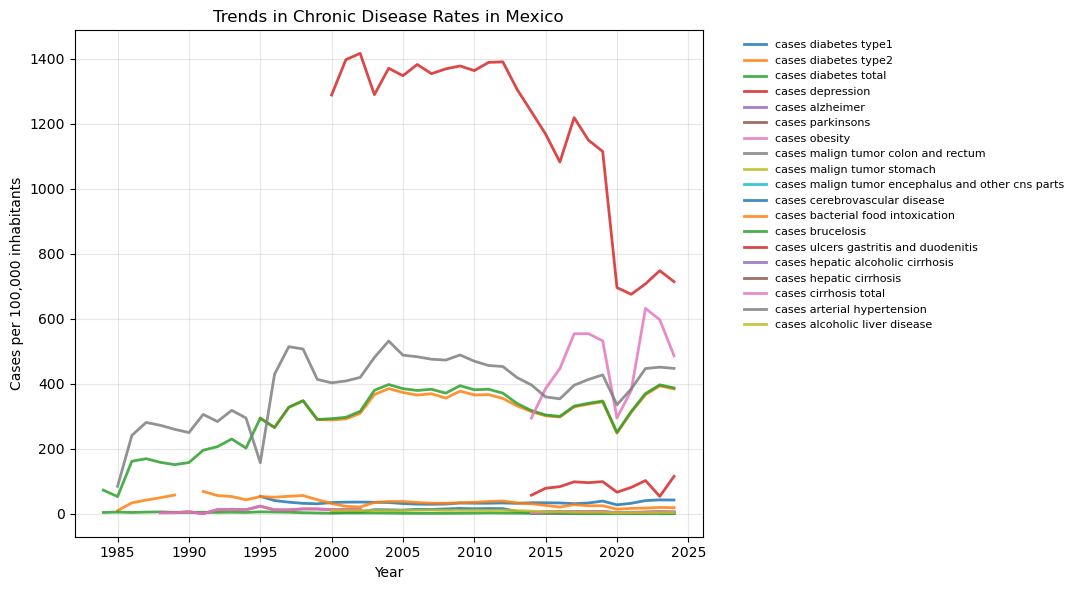

In [299]:
#A1. Time series of disease rate (2)
#A) CHRONIC DISEASE
import pandas as pd
import matplotlib.pyplot as plt

#OPENING DATASET
df = pd.read_csv("disease_with_rates_eco2.csv")
df = df.sort_values("year")

##SELECTING RATES ONLY
disease_rates = [c for c in df_dis.columns if c.startswith("rate_cases_")]

##PLOTING RATES OVER TIME
plt.figure(figsize=(11, 6))

for col in disease_rates:
    if col in df.columns:
        plt.plot(
            df["year"],
            df[col],
            linewidth=2,
            alpha=0.85,
            label=col.replace("rate_", "").replace("_", " ")
        )

plt.xlabel("Year")
plt.ylabel("Cases per 100,000 inhabitants")
plt.title("Trends in Chronic Disease Rates in Mexico")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8, frameon=False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


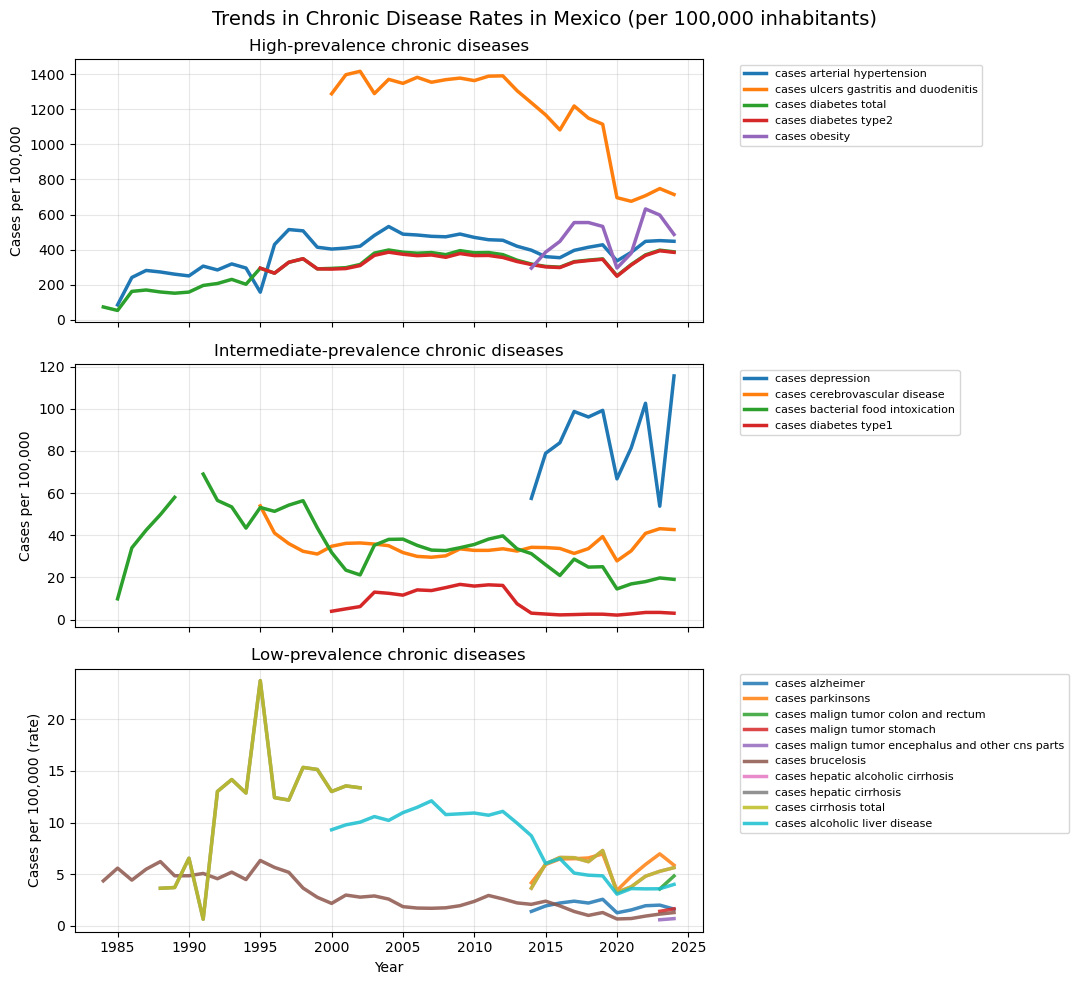

In [300]:
#A1. Time series of disease rate (3)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("disease_with_rates_eco2.csv").sort_values("year")

# -----------------------------
# Disease groups by prevalence
# -----------------------------
high_prevalence = [
    "rate_cases_arterial_hypertension", #*
    "rate_cases_ulcers_gastritis_and_duodenitis", #*
    "rate_cases_diabetes_total", #*
    "rate_cases_diabetes_type2",#*
    "rate_cases_obesity", #*
]

mid_prevalence = [
    "rate_cases_depression",
    "rate_cases_cerebrovascular_disease",
    "rate_cases_bacterial_food_intoxication",
    "rate_cases_diabetes_type1",
    
]


low_prevalence = [
    c for c in disease_rates
    if c not in high_prevalence and c not in mid_prevalence
]

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

# ---- High prevalence ----
for col in high_prevalence:
    axes[0].plot(
        df["year"],
        df[col],
        linewidth=2.5,
        label=col.replace("rate_", "").replace("_", " ")
    )
axes[0].set_title("High-prevalence chronic diseases", fontsize=12)
axes[0].set_ylabel("Cases per 100,000")
axes[0].legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=8,
    frameon=True
)
axes[0].grid(alpha=0.3)

# ---- Mid prevalence ----
for col in mid_prevalence:
    axes[1].plot(
        df["year"],
        df[col],
        linewidth=2.5,
        label=col.replace("rate_", "").replace("_", " ")
    )
axes[1].set_title("Intermediate-prevalence chronic diseases", fontsize=12)
axes[1].set_ylabel("Cases per 100,000")
axes[1].legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=8,
    frameon=True
)
axes[1].grid(alpha=0.3)

# ---- Low prevalence ----
for col in low_prevalence:
    axes[2].plot(
        df["year"],
        df[col],
        linewidth=2.5,
        alpha=0.85,
        label=col.replace("rate_", "").replace("_", " ")
    )
axes[2].set_title("Low-prevalence chronic diseases", fontsize=12)
axes[2].set_ylabel("Cases per 100,000 (rate)")
axes[2].legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=8,
    frameon=True
)
axes[2].grid(alpha=0.3)

plt.xlabel("Year")
plt.suptitle(
    "Trends in Chronic Disease Rates in Mexico (per 100,000 inhabitants)",
    fontsize=14,
    y=0.98
)
plt.tight_layout()


#SAVE FIGURE
plt.savefig('results/Trends_chronic_diseases_Mexico_highmidlow_rates', dpi=500, bbox_inches='tight')

#SHOW FIGURE
plt.show()



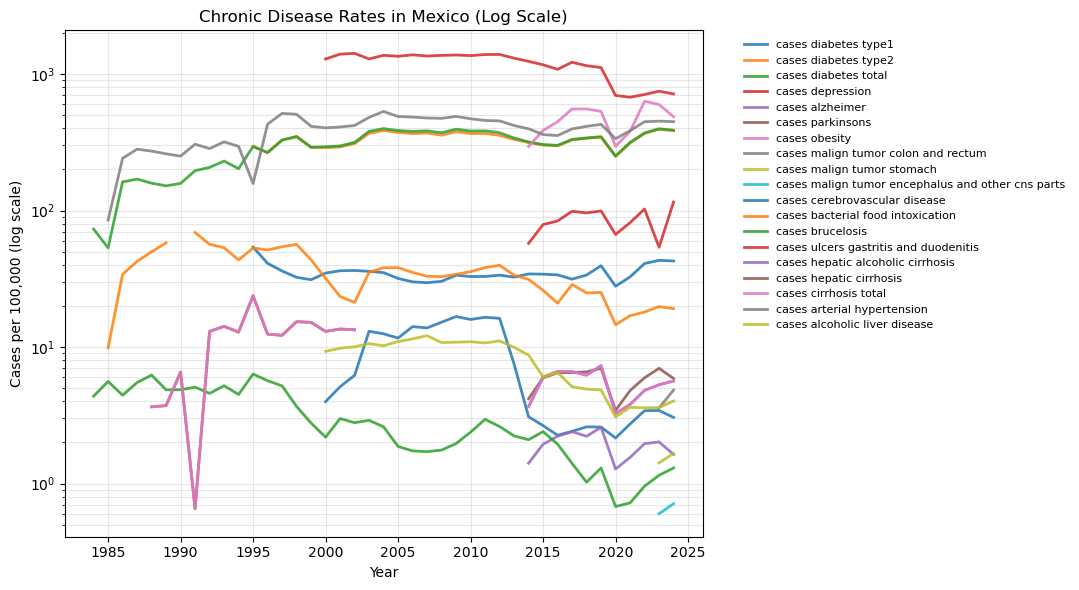

In [301]:
#A1. Time series of disease rate (4)
plt.figure(figsize=(11, 6))

for col in disease_rates:
    plt.plot(
        df["year"],
        df[col],
        linewidth=2,
        alpha=0.85,
        label=col.replace("rate_", "").replace("_", " ")
    )

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Cases per 100,000 (log scale)")
plt.title("Chronic Disease Rates in Mexico (Log Scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8, frameon=False)
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()


### A2 Pearson correlation heatmap — ALL diseases (lelvels - descriptive)
SIMPLE CORRELATIONS PEARSON + HEATMAP - GENERAL DISEASE RATES


In [302]:
###==================================================================
# A2.- HEATMAP FUNCTION - Pearson correlation heatmap — ALL diseases (descriptive) (0) 
###==================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_correlation_matrix(
    corr_matrix,
    title=None,
    cbar_label="Pearson r",
    cmap="coolwarm",  # Add cmap parameter here
    center=0,
    annot=True,
    fmt=".2f",
    figsize=(14, 12),
    square=True,
    linewidths=0.5,
    xlabel_rotation=90,
    ylabel_rotation=0,
    show_plot=True,
    ##new
    xlabel = None,
    ylabel = None,
    # NEW: Save option
    save_path=None,
    dpi=300,
):
    """
    Simple wrapper to plot correlation matrix.
    
    Parameters:
    -----------
    corr_matrix : DataFrame or array
        Correlation matrix to plot
    title : str, optional
        Plot title (default: None)
    cbar_label : str, optional
        Label for colorbar (default: "Pearson r")
    cmap : str, optional
        Colormap name. Common options:
        - "coolwarm" (default): blue to red, good for correlations
        - "RdBu_r": red to blue, diverging
        - "viridis": perceptually uniform sequential
        - "plasma": bright sequential
        - "Spectral": rainbow colors
        - "icefire": blue-white-red
        - "Greens": sequential green
        - "Blues": sequential blue
        - "rocket": dark sequential
        - "mako": dark sequential
    save_path : str, optional
        Path to save the figure (e.g., 'path/to/figure.png')
        If None, figure is not saved (default)
    dpi : int, optional
        Resolution for saved figure (default: 300)
    ... (other parameters for fine-tuning)
    """
    plt.figure(figsize=figsize)
    
    sns.heatmap(
        corr_matrix,
        cmap=cmap,  # Use the cmap parameter
        center=center,
        square=square,
        linewidths=linewidths,
        annot=annot,
        fmt=fmt,
        cbar_kws={"label": cbar_label}
    )
    
    if title:
        plt.title(title)
    
    plt.xticks(rotation=xlabel_rotation)
    plt.yticks(rotation=ylabel_rotation)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.tight_layout()
    
    # NEW: Save the figure if save_path is provided
    if save_path:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")
    
    if show_plot:
        plt.show()
    
    return plt.gcf()

    #------------------------
    # HOW TO CALL THE HEATMAP FUNCTION
    #

    """
    # Example call with save option:
    plot_correlation_matrix(
        corr_matrix_pear1, ## matrix to print
        title="Pearson Correlation Matrix of Disease Incidence Rates in Mexico (Levels, per 100,000 population)",
        cbar_label="Pearson r",
        cmap="RdBu_r",  # Red to blue diverging
        annot=True,
        figsize=(14, 12),
        save_path="results/correlation_matrix.png",  # NEW: Save the figure
        dpi=300,  # NEW: Optional DPI setting
    )
    
    # Example call without save (backward compatible):
    plot_correlation_matrix(
        corr_matrix_pear1,
        title="Pearson Correlation Matrix",
        cmap="coolwarm",
    )
    """

Figure saved to: results/heatmap_all_diseases_above10.png


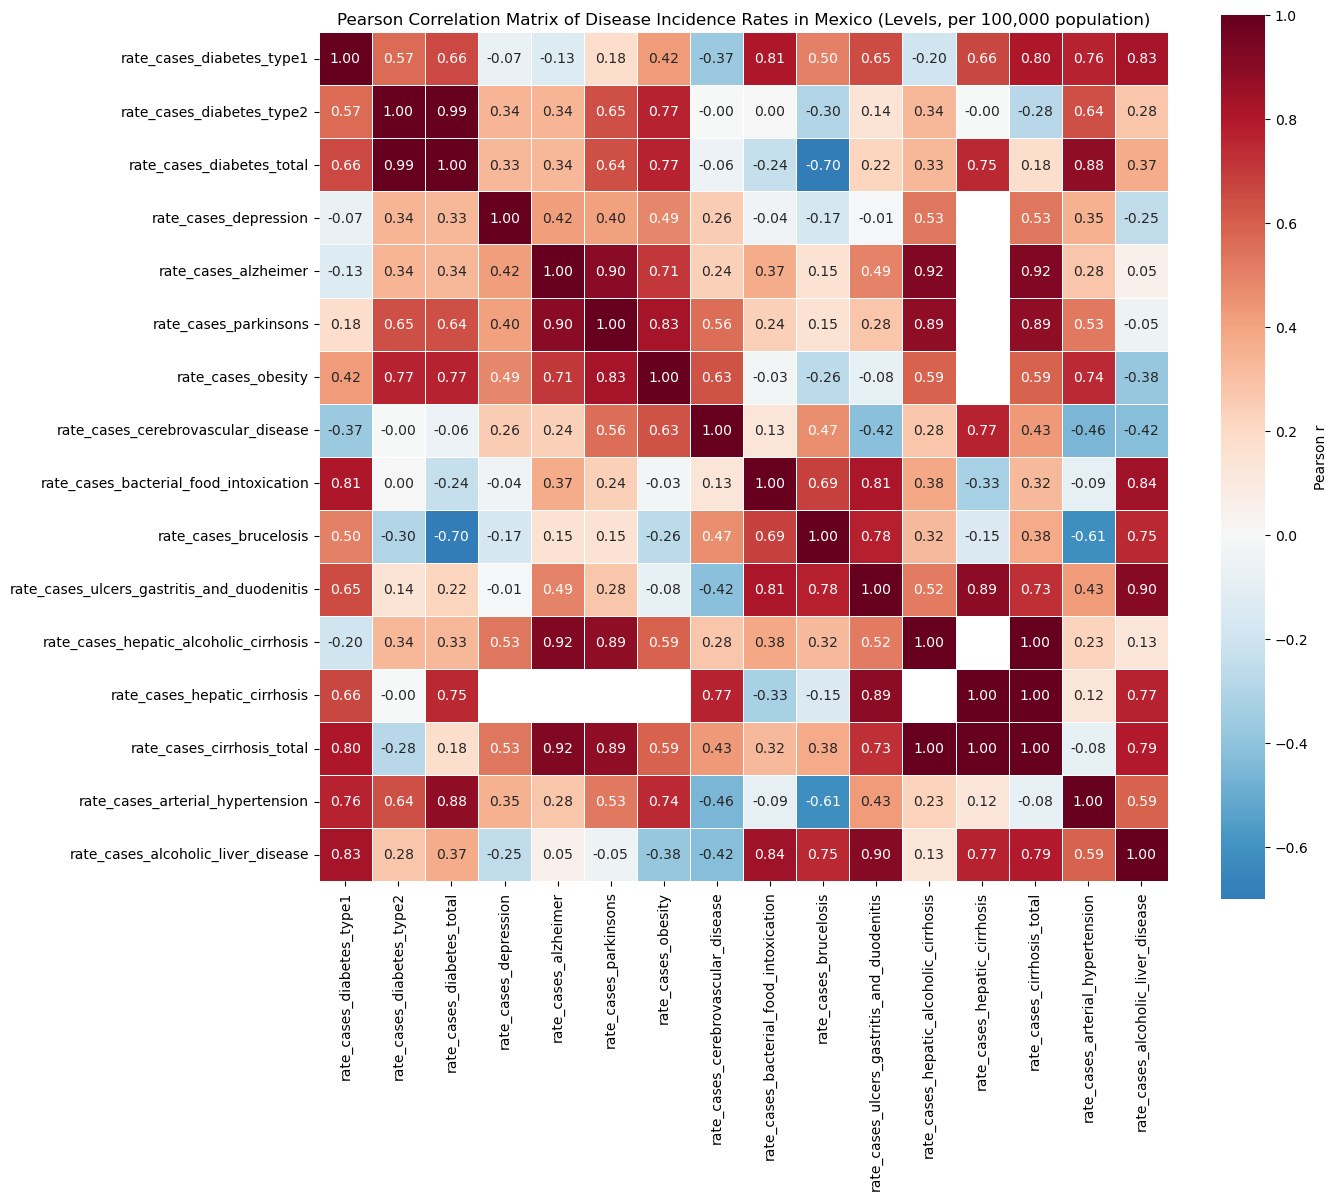

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [305]:
###==================================================================
### A2.- Pearson correlation heatmap — ALL diseases (levels - descriptive)  (1)
###==================================================================
# Select only rate columns
rate_cols = [c for c in df_dis.columns if c.startswith("rate_cases_")]

df_rates = df_dis[["year"] + rate_cols].set_index("year")

#print(df_dis["rate_cases_alcoholic_liver_disease"])
#print(df_rates.head(12))

df_rates = df_rates.dropna(axis=1, thresh=10)  # keep if ≥10 observations

corr_matrix_pear1 = df_rates.corr(method="pearson")

#print(corr_matrix_pear1.round(2))


###==================================================================
### Pearson correlation heatmap — ALL diseases (descriptive) (2)- using function
###==================================================================
plot_correlation_matrix(
    corr_matrix_pear1,
    title="Pearson Correlation Matrix of Disease Incidence Rates in Mexico (Levels, per 100,000 population)",
    cbar_label="Pearson r",
    cmap="RdBu_r",  # Red to blue diverging,
    save_path="results/heatmap_all_diseases_above10.png",  # NEW: Save the figure
    dpi=500,  # NEW: Optional DPI setting
)



#### A3.- Pearson correlation heatmap (LEVELS) — CHRONIC diseases only

Figure saved to: results/heatmap_CHRONIC_diseases_above10.png


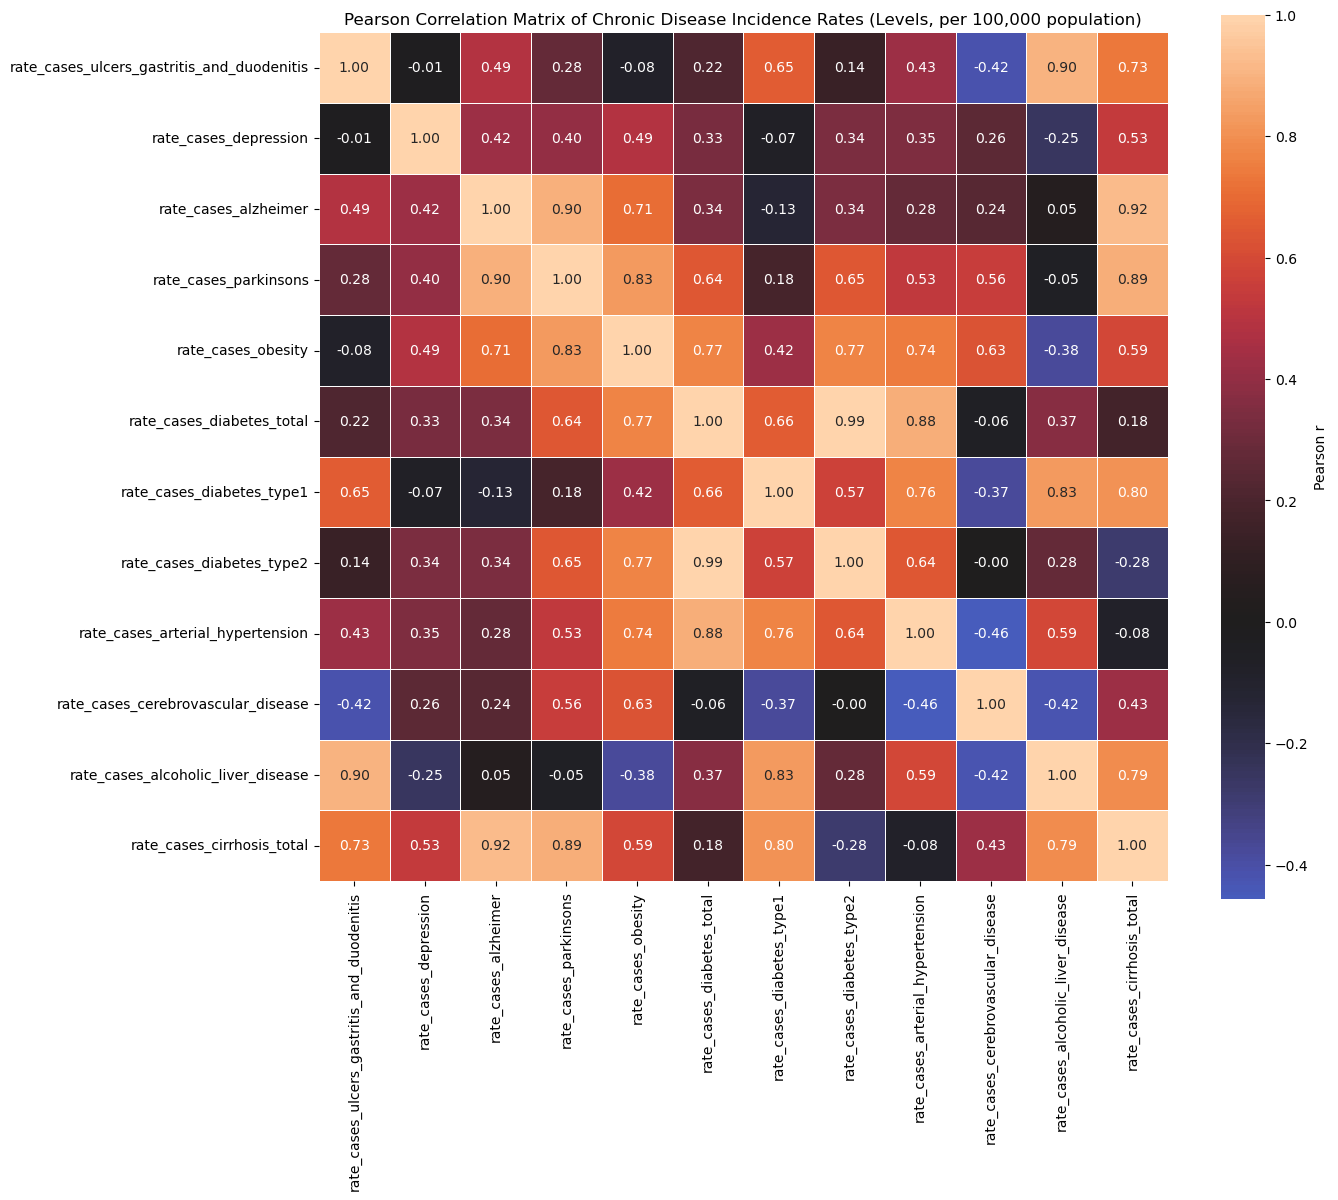

This heatmap answers:
 Do diseases tend to be high in the same years and low in the same years?




<Figure size 640x480 with 0 Axes>

In [306]:
##==================================================
# A3.- Pearson correlation heatmap — CHRONIC diseases only (1)
##==================================================
chronic_rates = [
    "rate_cases_ulcers_gastritis_and_duodenitis",
    "rate_cases_depression",
    "rate_cases_alzheimer",
    "rate_cases_parkinsons",
    "rate_cases_obesity",
    "rate_cases_malign_tumor_colon_and_rectum",
    "rate_cases_malign_tumor_stomach",
    "rate_cases_malign_tumor_encephalus_and_other_cns_parts",
    "rate_cases_diabetes_total",
    "rate_cases_diabetes_type1",
    "rate_cases_diabetes_type2",
    "rate_cases_arterial_hypertension",
    "rate_cases_cerebrovascular_disease",
    "rate_cases_alcoholic_liver_disease",
    "rate_cases_cirrhosis_total",
]

##=================
#Creating dataframe
##================

# Select only rate columns


cr_rates = df_dis[["year"] + chronic_rates].set_index("year")

#print(df_dis["rate_cases_alcoholic_liver_disease"])
#print(df_rates.head(12))

cr_rates = cr_rates.dropna(axis=1, thresh=10)  # keep if ≥10 observations

chr_corr_matrix_pear= cr_rates.corr(method="pearson")

#print(corr_matrix_cr_pear.round(2))

##=================
#Creating chronic diseases heatmap
##================

plot_correlation_matrix(
    chr_corr_matrix_pear,
    title="Pearson Correlation Matrix of Chronic Disease Incidence Rates (Levels, per 100,000 population)",
    cbar_label="Pearson r",
    cmap="icefire",
    save_path="results/heatmap_CHRONIC_diseases_above10.png",  # NEW: Save the figure
    dpi=500,  # NEW: Optional DPI setting
)

print("This heatmap answers:\n Do diseases tend to be high in the same years and low in the same years?\n\n")


#### A4. Δ–Δ (first-difference) correlation heatmap

Figure saved to: results/first_differences_correlation heatmap of chronic disease rates


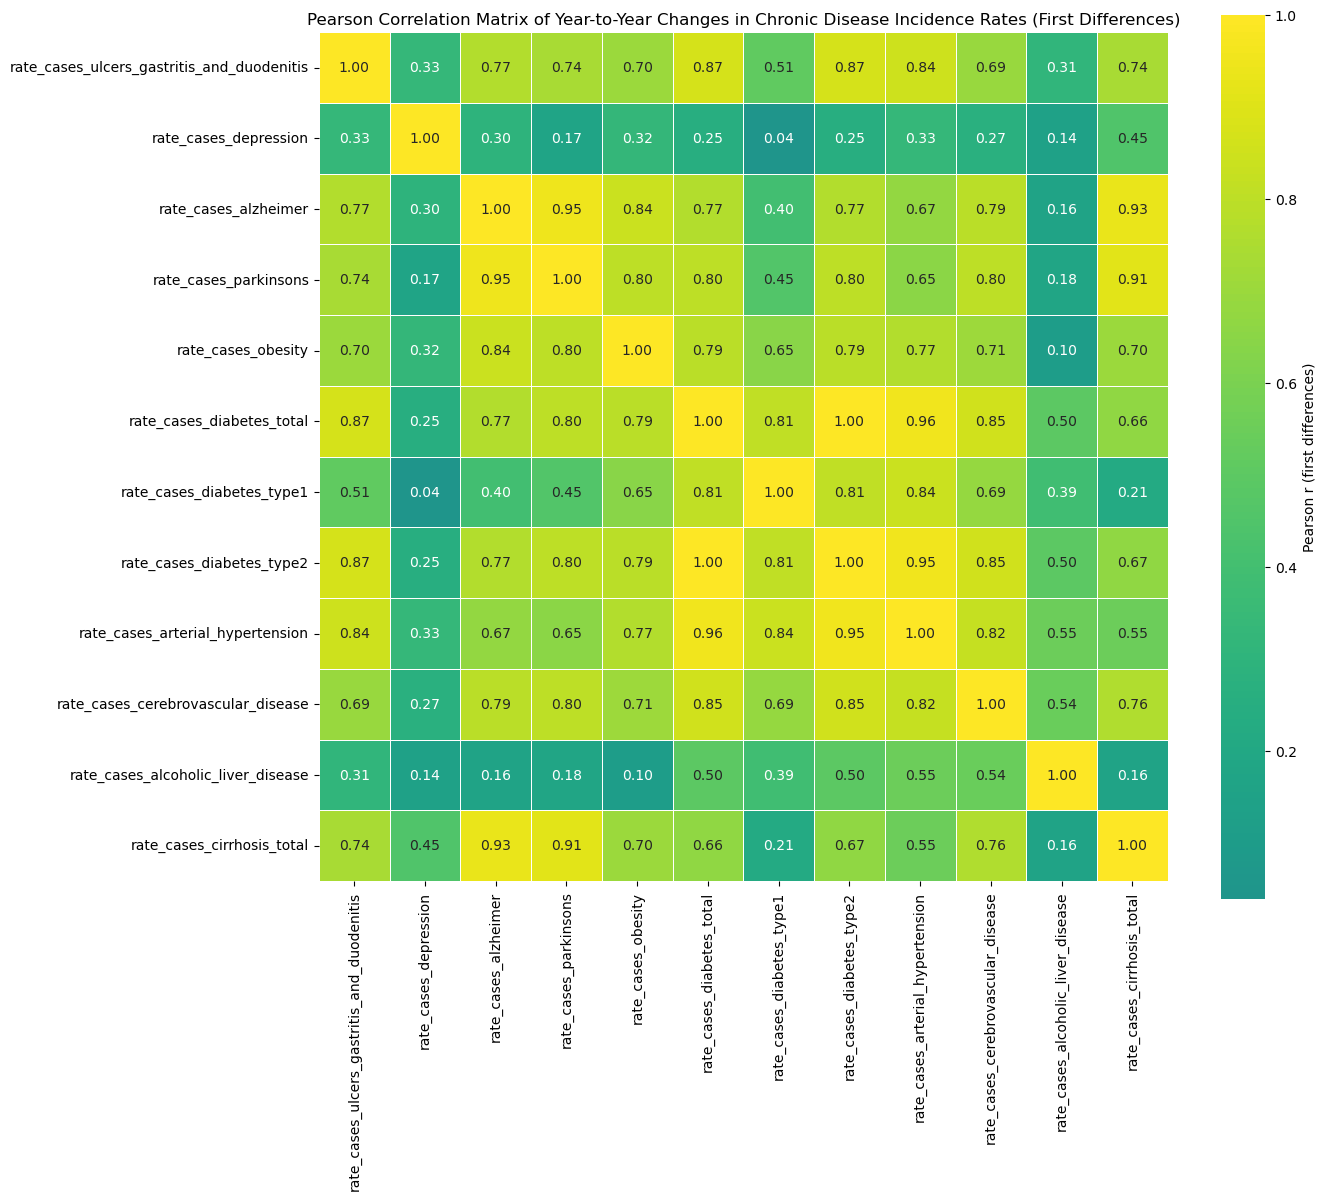

This heatmap answers:
When one disease increases faster this year, do others also increase faster the same year?


Clusters here represent:
common exposures (diet, environment, economics)
surveillance system shifts
healthcare access changes





<Figure size 640x480 with 0 Axes>

In [307]:
##==================================================
# A4. Δ–Δ (first-differences) correlation heatmap of chronic disease rates
##==================================================
cr_rates_diff = cr_rates.diff().dropna()



corr_diff = cr_rates_diff.corr(method="pearson")

plot_correlation_matrix(
    corr_diff,
    title="Pearson Correlation Matrix of Year-to-Year Changes in Chronic Disease Incidence Rates (First Differences)",
    cbar_label="Pearson r (first differences)",
    cmap="viridis",  # Red to blue diverging
    save_path="results/first_differences_correlation heatmap of chronic disease rates",  # NEW: Save the figure
    dpi=500,  # NEW: Optional DPI setting
)



print("This heatmap answers:\nWhen one disease increases faster this year, do others also increase faster the same year?\n\n")
print("Clusters here represent:\ncommon exposures (diet, environment, economics)\nsurveillance system shifts\nhealthcare access changes\n\n\n")

In [317]:
## EXTRACTING VALUES
corr_mat = corr_diff   # your A4 matrix

# Flatten upper triangle (no duplicates)
vals = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool)).stack()

print(vals.describe())

vals.sort_values(ascending=True).head(5)
vals.sort_values().head(5)




count    66.000000
mean      0.608238
std       0.259946
min       0.039839
25%       0.391091
50%       0.694297
75%       0.803369
max       0.999985
dtype: float64


rate_cases_depression               rate_cases_diabetes_type1             0.039839
rate_cases_obesity                  rate_cases_alcoholic_liver_disease    0.104608
rate_cases_depression               rate_cases_alcoholic_liver_disease    0.142245
rate_cases_alcoholic_liver_disease  rate_cases_cirrhosis_total            0.156556
rate_cases_alzheimer                rate_cases_alcoholic_liver_disease    0.163404
dtype: float64

# BLOCK B — Temporal Structure and Substitution Dynamics of Dietary Intake (NOVA)
- 2.4.a (B1. )Time series of NOVA category energy shares (% kcal)
- 2.4.b  (B2.) Structural dietary substitution analysis (UPF vs unprocessed)
- 2.4.c (B3.) Short-term dietary coupling (Δ–Δ correlations among NOVA categories)


In [334]:
##========================================
## B1. Time series of NOVA categories (% kcal)
##========================================

import pandas as pd
import matplotlib.pyplot as plt

#OPENING DATASET
nova = pd.read_csv("starting_dbs/nova_1984_2024.csv")

##-------------------------
### NEEED TO CLEAN FIRST; GET RID OF COMMAS !!!!!!
nova.columns = nova.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert everything except "year" to numeric in NOVA FOODS dataset
for col in nova.columns:
    if col != "year":
        nova[col] = (
             nova[col]
             .astype(str)
             .str.replace(",", "", regex=False) # remove commas
             .str.replace(" ", "", regex=False) # remove spaces in numbers
             .str.replace("\u202f", "", regex=False) # remove narrow non-br
             .str.replace("\xa0", "", regex=False) # remove no-break spac
             )
 # Convert to numeric
        nova[col] = pd.to_numeric(nova[col], errors="coerce")
    
##-------------------------
 
#sort values
nova = nova.sort_values("year")
nova.to_csv("results/nova_clean_eco2.csv")
nova

,year,total_kcal,pct_kcal_unprocessed,pct_kcal_ingredients,pct_kcal_processed,pct_kcal_ultra_processed
0,1984,2428.8,69.8,14.0,5.7,10.5
1,1989,2296.4,67.7,12.8,5.6,13.9
2,1992,2174.9,69.0,12.5,5.4,13.2
3,1994,2195.0,67.7,13.2,5.1,14.0
4,1996,2149.7,68.5,13.3,4.9,13.2
5,1998,2076.6,66.8,12.1,5.3,15.8
6,2000,2199.5,65.2,13.3,5.2,16.3
7,2002,2111.4,65.4,11.9,5.5,17.2
8,2004,1692.9,67.1,7.9,5.4,19.5
9,2006,1841.9,61.6,10.1,6.0,22.3


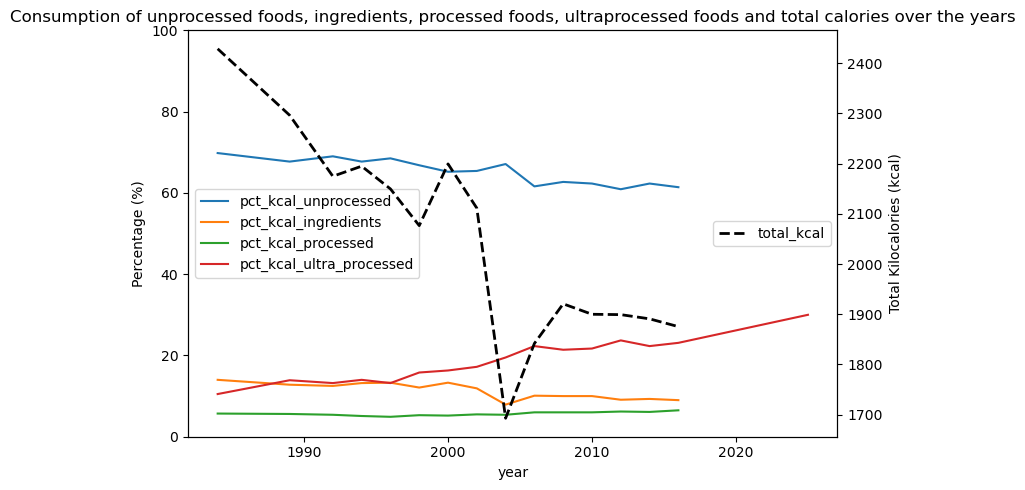

In [318]:
import matplotlib.pyplot as plt

# 1. Define the columns
pct_cols = ['pct_kcal_unprocessed', 'pct_kcal_ingredients', 'pct_kcal_processed', 'pct_kcal_ultra_processed']
total_col = 'total_kcal'

# 2. Create the figure and the first axis (for percentages)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot percentages on the left axis (ax1)
nova.set_index('year')[pct_cols].plot(ax=ax1)
ax1.set_ylabel("Percentage (%)")
ax1.set_ylim(0, 100) # Optional: lock percentages to 100

# 3. Create the second axis for Total Kcal
ax2 = ax1.twinx()
nova.set_index('year')[total_col].plot(ax=ax2, color='black', linestyle='--', linewidth=2)
ax2.set_ylabel("Total Kilocalories (kcal)")

# 4. Final touches
plt.title("Consumption of unprocessed foods, ingredients, processed foods, ultraprocessed foods and total calories over the years")
ax1.legend(loc='center left')
ax2.legend(loc='center right')
plt.tight_layout()
plt.show()

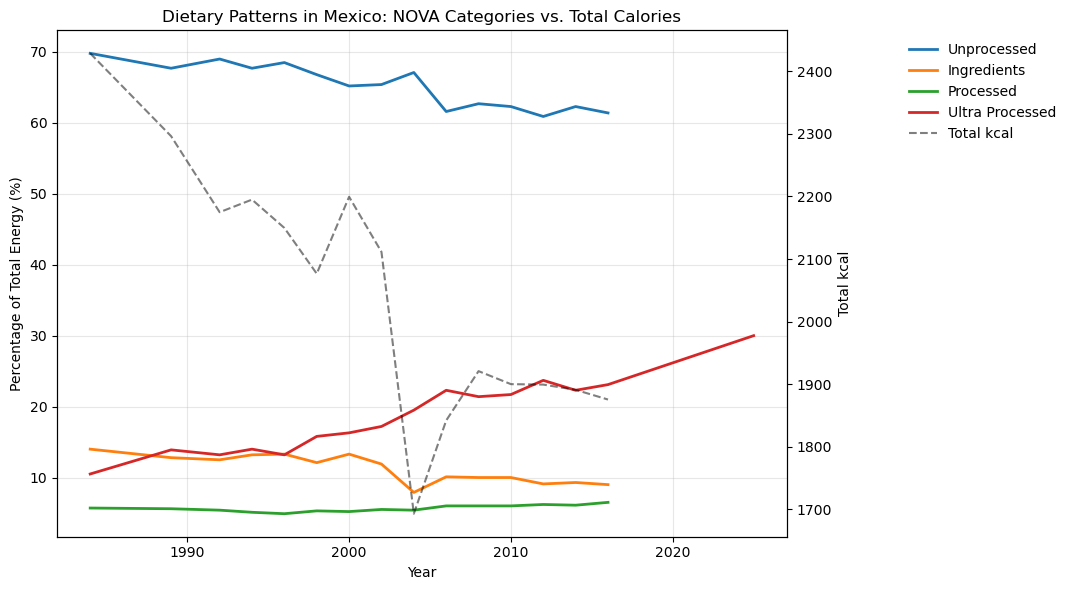

In [335]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(11, 6))

# 1. Plot Percentages on ax1
lines = [] # We'll store the line objects here to combine legends later
for col in nova.columns:
    if col.startswith("pct_"):
        ln, = ax1.plot(
            nova["year"], 
            nova[col], 
            linewidth=2, 
            label=col.replace("pct_kcal_", "").replace("_", " ").title()
        )
        lines.append(ln)

# 2. Plot Total Kcal on ax2
ax2 = ax1.twinx()
ln_total, = ax2.plot(
    nova["year"], 
    nova["total_kcal"], 
    color="black", 
    linestyle="--", 
    alpha=0.5, 
    label="Total kcal"
)
lines.append(ln_total)

# 3. Combine all labels into one legend
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, bbox_to_anchor=(1.15, 1), loc="upper left", frameon=False)

# 4. Clean up axes
ax1.set_xlabel("Year")
ax1.set_ylabel("Percentage of Total Energy (%)")
ax2.set_ylabel("Total kcal")
plt.title("Dietary Patterns in Mexico: NOVA Categories vs. Total Calories")
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##========================================
## B2. Displacement analysis (UPF vs unprocessed) 
##========================================

                             OLS Regression Results                             
Dep. Variable:     pct_kcal_unprocessed   R-squared:                       0.914
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                     138.1
Date:                  Wed, 28 Jan 2026   Prob (F-statistic):           2.68e-08
Time:                          12:16:29   Log-Likelihood:                -19.316
No. Observations:                    15   AIC:                             42.63
Df Residuals:                        13   BIC:                             44.05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

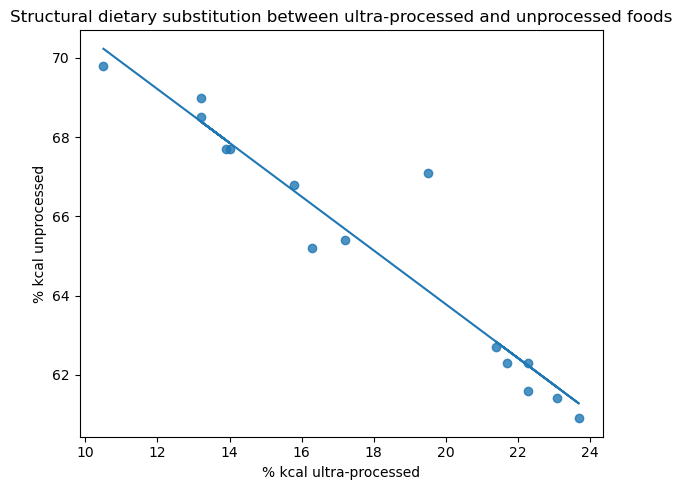

R² = 0.914
β (UPF) = -0.679, p = 2.68e-08
resulting model: % Unprocessed = 77.36 − 0.679 ⋅ %UltraProcessed


/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/2455728549.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"β (UPF) = {model.params[1]:.3f}, p = {model.pvalues[1]:.3g}")


In [336]:
##========================================
## B2. Displacement analysis (UPF vs unprocessed) 
##========================================
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant

# Load NOVA data
nova = pd.read_csv("results/nova_clean_eco2.csv")

nova_clean = nova.dropna(subset=[
    "pct_kcal_ultra_processed",
    "pct_kcal_unprocessed"
])

# Regression
X = add_constant(nova_clean["pct_kcal_ultra_processed"])
y = nova_clean["pct_kcal_unprocessed"]

model = OLS(y, X).fit()
print(model.summary())

# Plot
plt.figure(figsize=(6,5))

plt.scatter(
    nova_clean["pct_kcal_ultra_processed"],
    nova_clean["pct_kcal_unprocessed"],
    alpha=0.8 #GRAPH TRANSPARENCY
)

plt.plot(
    nova_clean["pct_kcal_ultra_processed"],
    model.predict(X)
)

plt.xlabel("% kcal ultra-processed")
plt.ylabel("% kcal unprocessed")
plt.title("Structural dietary substitution between ultra-processed and unprocessed foods")

plt.tight_layout()

#SAVE FIGURE
plt.savefig('results/Structural dietary substitution between ultra-processed and unprocessed foods', dpi=500, bbox_inches='tight')

plt.show()

print(f"R² = {model.rsquared:.3f}")
print(f"β (UPF) = {model.params[1]:.3f}, p = {model.pvalues[1]:.3g}")
print("resulting model: % Unprocessed = 77.36 − 0.679 ⋅ %UltraProcessed")



                             OLS Regression Results                             
Dep. Variable:     pct_kcal_unprocessed   R-squared:                       0.914
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                     138.1
Date:                  Wed, 28 Jan 2026   Prob (F-statistic):           2.68e-08
Time:                          12:21:07   Log-Likelihood:                -19.316
No. Observations:                    15   AIC:                             42.63
Df Residuals:                        13   BIC:                             44.05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/720132806.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/720132806.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/720132806.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_v

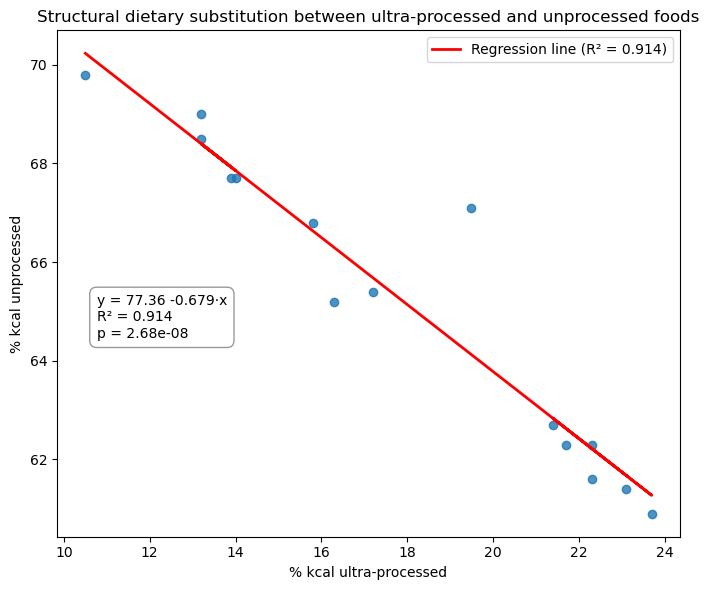

R² = 0.914
β (UPF) = -0.679, p = 2.68e-08
Intercept = 77.356, p = 2.24e-18
resulting model: % Unprocessed = 77.36 -0.679 ⋅ %UltraProcessed


/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/720132806.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"β (UPF) = {model.params[1]:.3f}, p = {model.pvalues[1]:.3g}")
/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/720132806.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept = {model.params[0]:.3f}, p = {model.pvalues[0]:.3g}")
/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_3373/720132806.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

In [338]:
##========================================
## B2. Displacement analysis (UPF vs unprocessed) 
##========================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import OLS, add_constant

# Load NOVA data
nova = pd.read_csv("results/nova_clean_eco2.csv")

nova_clean = nova.dropna(subset=[
    "pct_kcal_ultra_processed",
    "pct_kcal_unprocessed"
])

# Regression
X = add_constant(nova_clean["pct_kcal_ultra_processed"])
y = nova_clean["pct_kcal_unprocessed"]

model = OLS(y, X).fit()
print(model.summary())

# Plot 
plt.figure(figsize=(7,6))

plt.scatter(
    nova_clean["pct_kcal_ultra_processed"],
    nova_clean["pct_kcal_unprocessed"],
    alpha=0.8 #GRAPH TRANSPARENCY
)

plt.plot(
    nova_clean["pct_kcal_ultra_processed"],
    model.predict(X),
    color='red',
    linewidth=2,
    label=f'Regression line (R² = {model.rsquared:.3f})'
)

# Add regression equation and stats as text on plot
intercept = model.params[0]
slope = model.params[1]
p_value = model.pvalues[1]
r_squared = model.rsquared

# Format the equation text
equation_text = f'y = {intercept:.2f} {slope:+.3f}·x'
stats_text = f'R² = {r_squared:.3f}\np = {p_value:.3g}'

# Position the text (adjust as needed based on your data range)
x_min = nova_clean["pct_kcal_ultra_processed"].min()
x_max = nova_clean["pct_kcal_ultra_processed"].max()
y_min = nova_clean["pct_kcal_unprocessed"].min()
y_max = nova_clean["pct_kcal_unprocessed"].max()

# Put text in top-left corner (adjust coordinates as needed)
plt.text(
    x_min + 0.02 * (x_max - x_min),  # 2% from left edge
    y_max - 0.5 * (y_max - y_min),  # 5% from top edge
    f'{equation_text}\n{stats_text}',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'),
    fontsize=10,
    verticalalignment='top'
)

plt.xlabel("% kcal ultra-processed")
plt.ylabel("% kcal unprocessed")
plt.title("Structural dietary substitution between ultra-processed and unprocessed foods")
plt.legend(loc='best')

plt.tight_layout()

# SAVE FIGURE (before plt.show
plt.savefig('results/Structural dietary substitution between ultra-processed and unprocessed foods.png', 
            dpi=500, bbox_inches='tight')

plt.show()

print(f"R² = {model.rsquared:.3f}")
print(f"β (UPF) = {model.params[1]:.3f}, p = {model.pvalues[1]:.3g}")
print(f"Intercept = {model.params[0]:.3f}, p = {model.pvalues[0]:.3g}")
print(f"resulting model: % Unprocessed = {model.params[0]:.2f} {model.params[1]:+.3f} ⋅ %UltraProcessed")

In [339]:
# from statsmodels.api import OLS, add_constant

def run_displacement(y_col):
    X = add_constant(nova_clean["pct_kcal_ultra_processed"])
    y = nova_clean[y_col]
    model = OLS(y, X).fit()
    print(f"\n=== {y_col} vs UPF ===")
    print(model.summary())
    return model

m_unprocessed = run_displacement("pct_kcal_unprocessed")
m_ingredients  = run_displacement("pct_kcal_ingredients")
m_processed    = run_displacement("pct_kcal_processed")   # optional



=== pct_kcal_unprocessed vs UPF ===
                             OLS Regression Results                             
Dep. Variable:     pct_kcal_unprocessed   R-squared:                       0.914
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                     138.1
Date:                  Wed, 28 Jan 2026   Prob (F-statistic):           2.68e-08
Time:                          12:21:28   Log-Likelihood:                -19.316
No. Observations:                    15   AIC:                             42.63
Df Residuals:                        13   BIC:                             44.05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

##========================================
#### B3. Optional but strong: Δ–Δ correlation between NOVA categories

##========================================

Years available: [1984, 1989, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]
N observations: 15

N after differencing: 14

Δ–Δ correlation matrix (NOVA):
                          pct_kcal_ultra_processed  pct_kcal_unprocessed  \
pct_kcal_ultra_processed                      1.00                 -0.66   
pct_kcal_unprocessed                         -0.66                  1.00   
pct_kcal_ingredients                         -0.28                 -0.53   
pct_kcal_processed                            0.47                 -0.59   

                          pct_kcal_ingredients  pct_kcal_processed  
pct_kcal_ultra_processed                 -0.28                0.47  
pct_kcal_unprocessed                     -0.53               -0.59  
pct_kcal_ingredients                      1.00                0.12  
pct_kcal_processed                        0.12                1.00  


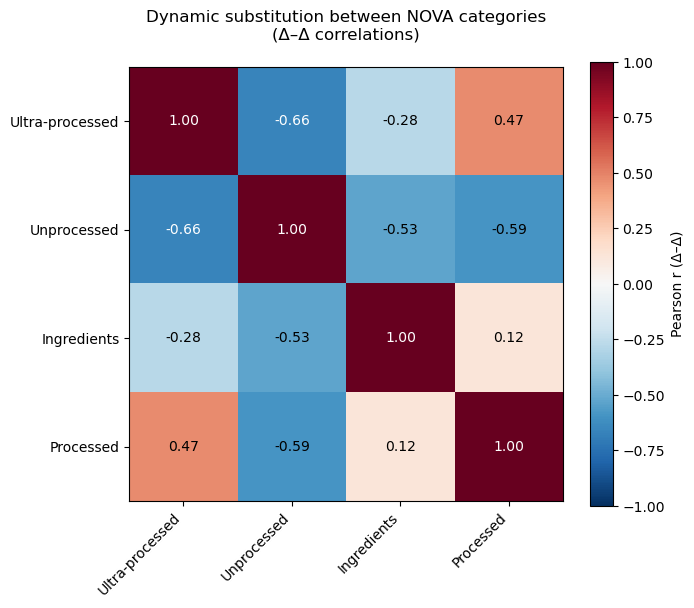

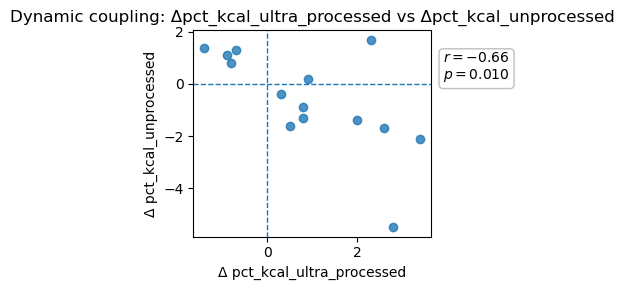

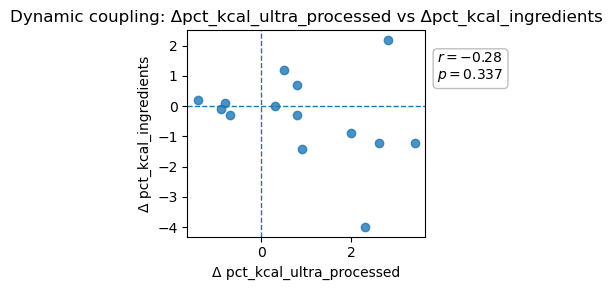

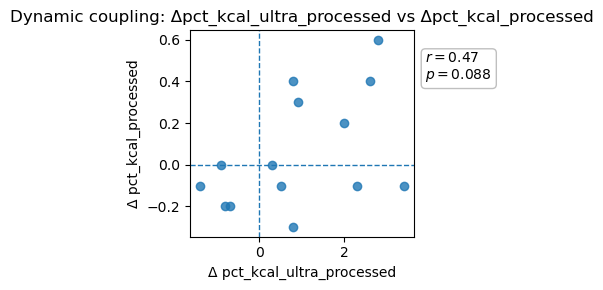

In [323]:
##========================================
## B3. Optional but strong: Δ–Δ correlation between NOVA categories
##========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------
#Load NOVA dataset (already cleaned previously)
#-----------------------------
nova = pd.read_csv("nova_clean_eco2.csv")

#Sort by time (IMPORTANT)
nova = nova.sort_values("year").reset_index(drop=True)

#Select NOVA percentage variables
nova_vars = [
"pct_kcal_ultra_processed",
"pct_kcal_unprocessed",
"pct_kcal_ingredients",
"pct_kcal_processed"
]

df_nova = nova[["year"] + nova_vars].dropna().copy()

print("Years available:", df_nova["year"].tolist())
print("N observations:", len(df_nova))

#-----------------------------
#Compute first differences
#-----------------------------
df_nova_diff = df_nova.copy()

for v in nova_vars:
    df_nova_diff[v] = df_nova_diff[v].diff()

df_nova_diff = df_nova_diff.dropna().reset_index(drop=True)

print("\nN after differencing:", len(df_nova_diff))



# -----------------------------
# Correlation matrix (Δ–Δ)
# -----------------------------
corr_diff = df_nova_diff[nova_vars].corr()

print("\nΔ–Δ correlation matrix (NOVA):")
print(corr_diff.round(2))



# -----------------------------
# Heatmap visualization
# -----------------------------

labels = [
    "Ultra-processed",
    "Unprocessed",
    "Ingredients",
    "Processed"
]

corr = corr_diff.values

fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(corr, vmin=-1, vmax=1, cmap='RdBu_r')

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Pearson r (Δ–Δ)")

# Ticks
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_yticklabels(labels)

# Annotate values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        # Change text color to white if background is too dark
        text_color = "white" if abs(corr[i,j]) > 0.6 else "black"
        ax.text(j, i, f"{corr[i,j]:.2f}",
                ha="center", va="center",
                color=text_color,
                fontsize=10)

ax.set_title("Dynamic substitution between NOVA categories\n(Δ–Δ correlations)", pad=20)

# Option A: Manual adjustment (Recommended for total control)
plt.subplots_adjust(top=0.85) # Creates space at the top for the title

# Option B: Modern Layout Engine
# fig.set_layout_engine('constrained') # Replace tight_layout with this

plt.savefig("results/NOVA_delta_delta_heatmap.png", dpi=600, bbox_inches="tight")
plt.show()
# -----------------------------
# Optional: scatter diagnostics
# -----------------------------

pairs = [
    ("pct_kcal_ultra_processed", "pct_kcal_unprocessed"),
    ("pct_kcal_ultra_processed", "pct_kcal_ingredients"),
    ("pct_kcal_ultra_processed", "pct_kcal_processed"),
]
from scipy.stats import pearsonr

# Inside your loop:


for x, y in pairs:
    
    plt.figure(figsize=(4, 3))
    plt.scatter(df_nova_diff[x], df_nova_diff[y], alpha=0.8)
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.axvline(0, linestyle="--", linewidth=1)
    plt.xlabel(f"Δ {x}")
    plt.ylabel(f"Δ {y}")
    plt.title(f"Dynamic coupling: Δ{x} vs Δ{y}")
    r_val, p_val = pearsonr(df_nova_diff[x], df_nova_diff[y])
    plt.annotate(f'$r = {r_val:.2f}$\n$p = {p_val:.3f}$', 
             xy=(1.05, 0.9), 
             xycoords='axes fraction', 
             ha='left', 
             va='top', 
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.5))

    # IMPORTANT: Use bbox_inches='tight' in savefig or the annotation will be cut off
    plt.savefig(f'results/scatter_{y}.png', dpi=500, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


### REPORTING BLOCK B

### index:
Temporal Structure and Substitution Dynamics of Dietary Intake (NOVA)
- 2.4.a (B1. )Time series of NOVA category energy shares (% kcal)
- 2.4.b  (B2.) Structural dietary substitution analysis (UPF vs unprocessed)
- 2.4.c (B3.) Short-term dietary coupling (Δ–Δ correlations among NOVA categories)



__Methods — Block B: Dietary transition and substitution analysis__

National dietary intake data classified by NOVA categories were analyzed to characterize long-term dietary structural changes. The dataset contained annual estimates of the percentage of total caloric intake derived from four food groups: unprocessed/minimally processed foods, culinary ingredients, processed foods, and ultra-processed foods.

__B1. Time-series visualization__

Time series plots were generated for each NOVA category (% of total energy) to visualize temporal trends and relative shifts in dietary composition over time. Total caloric intake was plotted on a secondary axis for contextual reference.

__B2. Structural displacement analysis__

To formally test whether increases in ultra-processed food (UPF) consumption occurred at the expense of other food categories, ordinary least squares (OLS) regressions were fitted using the following model:

        Yt = β0 + β1 ⋅ UPFt + εt
where 
𝑌𝑡 represents the percentage of total energy derived from (i) unprocessed foods, (ii) culinary ingredients, and (iii) processed foods in year t.

Each regression was estimated independently. Model goodness-of-fit (R²), regression coefficients, and statistical significance were evaluated.

This approach tests whether UPF expansion reflects structural substitution within the dietary system rather than additive caloric growth.
__B3. Dynamic substitution analysis

To evaluate whether dietary substitution operates dynamically rather than solely as a long-term trend, first differences were computed for each NOVA category:

        Δ𝑋𝑡 = 𝑋𝑡 − 𝑋(𝑡−1)

Pearson correlations were calculated between annual changes in ultra-processed food intake and changes in other NOVA categories (unprocessed foods, culinary ingredients, processed foods). This analysis tests whether short-term fluctuations in ultra-processed food consumption are temporally coupled to compensatory changes in other dietary components.

--------------------------------------------------------------------------------

__RESULTS — Block B: Dietary transition and substitution__

__B1. Temporal evolution of NOVA categories__

Time-series visualization showed a sustained increase in the proportion of total energy derived from ultra-processed foods, accompanied by a decline in unprocessed food consumption over the study period. Culinary ingredients also exhibited a downward trend, while processed foods remained relatively stable with modest fluctuations. Total caloric intake displayed moderate variability but did not fully explain the observed compositional shifts, indicating a structural change in dietary composition rather than simple caloric expansion.

__B2. Structural displacement analysis__

Regression analysis demonstrated a strong inverse relationship between ultra-processed food intake and unprocessed food intake:

* Unprocessed foods vs UPF
    * β = –0.679 (95% CI: –0.803 to –0.554)
    * R² = 0.914, p < 10⁻

This indicates that each 1% increase in energy derived from ultra-processed foods is associated with an approximate 0.68% decrease in energy derived from unprocessed foods.

A similarly strong displacement effect was observed for culinary ingredients:

* Ingredients vs UPF
    * β = –0.404 (95% CI: –0.523 to –0.284)
    * R² = 0.803, p < 10⁻⁵

This suggests that ultra-processed foods also partially replace traditional culinary ingredients.

In contrast, processed foods showed a modest positive association with ultra-processed foods:

* Processed foods vs UPF
    * β = +0.081 (95% CI: 0.041 to 0.121)
    * R² = 0.593, p ≈ 0.001
This indicates that processed food intake does not decline as UPF increases and may slightly co-increase.

Collectively, these results indicate that the expansion of ultra-processed foods primarily displaces unprocessed foods and culinary ingredients rather than replacing processed foods.

__B3. Dynamic substitution between NOVA categories__

To assess whether the observed long-term dietary substitution reflects true dynamic coupling rather than shared secular trends, first differences of NOVA category energy shares were computed (Δ year-to-year changes). Pearson correlations were calculated between changes in ultra-processed foods (UPF) and changes in other NOVA categories across 14 temporal intervals.

Year-to-year increases in UPF were moderately and negatively correlated with changes in unprocessed foods (r = −0.66), indicating that periods of rapid UPF expansion tended to coincide with contemporaneous declines in unprocessed food consumption. A weaker but still negative association was observed between UPF and culinary ingredients (r = −0.28). In contrast, UPF changes were positively correlated with changes in processed foods (r = 0.47), suggesting partial co-expansion rather than direct substitution within this category.

Consistently, changes in unprocessed foods were negatively correlated with changes in both processed foods (r = −0.59) and ingredients (r = −0.53), reinforcing the interpretation that increases in industrialized food consumption occur primarily at the expense of minimally processed dietary components.

Scatter plots of ΔUPF versus Δunprocessed and Δingredients demonstrated clustering in opposing quadrants, supporting directional substitution rather than random fluctuation (Figure B3).

--------------------------------------------------------------------------------
__Discussion — Block B: Dietary restructuring driven by ultra-processed foods__
The dietary transition analysis demonstrates that rising ultra-processed food consumption reflects a structural reorganization of the diet rather than a simple increase in total caloric intake. The exceptionally high explanatory power observed in the unprocessed food displacement model (R² ≈ 0.91) indicates that most of the long-term variability in unprocessed food consumption is statistically explained by changes in ultra-processed food intake.

* 
  
The simultaneous displacement of culinary ingredients further suggests erosion of traditional cooking patterns, consistent with increased reliance on industrially formulated foods. The modest positive association between ultra-processed and processed foods implies that these categories may coexist rather than compete directly, potentially reflecting shared industrial supply chains or consumer behaviors.

From a metabolic and epidemiological perspective, this substitution pattern is highly relevant. Replacement of unprocessed foods and culinary ingredients with ultra-processed products implies reduced intake of fiber, micronutrients, and protective phytochemicals, alongside increased exposure to refined carbohydrates, industrial fats, additives, and high glycemic load. These compositional changes are biologically consistent with pathways linking ultra-processed food intake to insulin resistance, low-grade inflammation, and cardiometabolic risk.

Importantly, the displacement structure observed here provides a mechanistic foundation for subsequent analyses linking dietary change to chronic disease trends. Rather than interpreting disease correlations solely as associations with absolute ultra-processed intake, the results indicate that ultra-processed foods actively replace nutritionally protective dietary components.

Limitations include the small number of annual observations and the ecological nature of the data, which precludes causal inference at the individual level. However, the consistency and magnitude of the observed associations strongly support the presence of a real structural dietary transition.


__DISCUSSION (OPTION 2) BETTER!!__


The dietary transition analysis demonstrate that the Mexican dietary transition to higher ultra-processed food consumption is not merely a gradual drift in mean dietary composition or a simple increase in total caloric intake, but rather it reflects active year-to-year substitution dynamics. The strong negative coupling between changes in ultra-processed and unprocessed food shares indicates that expansion of industrialized food intake directly displaces traditional food consumption rather than occurring through additive increases in total caloric intake alone.


The weaker but consistent negative association between UPF and culinary ingredients suggests secondary displacement of traditional cooking inputs, potentially reflecting reduced home food preparation and increased reliance on ready-to-eat products. The positive association between UPF and processed foods likely reflects shared industrial supply chains, market penetration, and retail expansion rather than direct nutritional substitution.

Importantly, the dynamic results independently validate the strong level-based displacement regression (R² ≈ 0.91), demonstrating that substitution operates both structurally (long-term) and dynamically (short-term). This dual confirmation strengthens causal plausibility for downstream analyses linking dietary transition to metabolic and inflammatory disease dynamics.

These findings justify the use of ultra-processed food share as a meaningful exposure variable for subsequent disease association analyses and support mechanistic hypotheses involving nutritional simplification, glycemic load, additive exposure, and microbiome disruption.


LINK B WITH C, MAYBE IN METHODS:"Given the strong structural and dynamic coupling between ultra-processed food expansion and displacement of traditional dietary components, we next evaluated whether year-to-year changes in dietary composition align with contemporaneous changes in chronic disease incidence."



# Section C — Dynamic Coupling and Mediated Associations Between Diet, Diabetes, and Chronic Disease

Subsections:

* C0. Data Harmonization and Temporal Alignment (formerly “Dataset harmonization and merging”)

* C1. Short-Term Dynamic Associations Between NOVA Categories and Disease Rates (formerly “Δ–Δ correlations: NOVA vs disease rates”)

* C2. Diabetes as a Systemic Mediator of Chronic Disease Dynamics

    * C2A. Long-Term Coupling Between Diabetes and Chronic Disease Rates (Full Dataset)
    * C2B. Short-Term Coupling Between Dietary Transitions and Diabetes (Merged Dataset)
    * C2B.1. Lagged Associations Between Ultra-Processed Food Intake and Subsequent Diabetes Change

### C0.- Dataset harmonization and merging

In [1]:
##========================================
### C0.- Data Harmonization and Temporal Alignment
##========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv("results/disease_with_rates_eco2.csv", decimal='.')
n = pd.read_csv("results/nova_clean_eco2.csv", decimal='.')

print(n)
#print("NOVA: ", n.head())

###---------------------
### CLEANING AND UNIFYING FORMAT
###-----------------------

## BOTH DATASETS WHERE ALREADY CLEANED AND SAVED SO SKIP

###---------------------
### MERGING DATASETS
###-----------------------

merged = pd.merge(d, n, on="year", how="inner")

print("Merged shape:", merged.shape)

# Save merged dataset
merged.to_csv("results/merged_ecological_set_eco2.csv", index=False)
print("Merged dataset saved as 'merged_ecological_set_eco2.csv'")

#loading merged dataset
merged = pd.read_csv('results/merged_ecological_set_eco2.csv',decimal='.')
merged

    Unnamed: 0  year  total_kcal  pct_kcal_unprocessed  pct_kcal_ingredients  \
0            0  1984      2428.8                  69.8                  14.0   
1            1  1989      2296.4                  67.7                  12.8   
2            2  1992      2174.9                  69.0                  12.5   
3            3  1994      2195.0                  67.7                  13.2   
4            4  1996      2149.7                  68.5                  13.3   
5            5  1998      2076.6                  66.8                  12.1   
6            6  2000      2199.5                  65.2                  13.3   
7            7  2002      2111.4                  65.4                  11.9   
8            8  2004      1692.9                  67.1                   7.9   
9            9  2006      1841.9                  61.6                  10.1   
10          10  2008      1920.8                  62.7                  10.0   
11          11  2010      1900.0        

,year,cases_diabetes_type1,cases_diabetes_type2,cases_diabetes_total,cases_depression,cases_alzheimer,cases_parkinsons,cases_obesity,cases_malign_tumor_colon_and_rectum,cases_malign_tumor_stomach,...,rate_cases_hepatic_cirrhosis,rate_cases_cirrhosis_total,rate_cases_arterial_hypertension,rate_cases_alcoholic_liver_disease,Unnamed: 0,total_kcal,pct_kcal_unprocessed,pct_kcal_ingredients,pct_kcal_processed,pct_kcal_ultra_processed
0,1984,NaN,NaN,54637.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.417433,2.417433,NaN,NaN,0,2428.8,69.8,14.0,5.7,10.5
1,1989,NaN,NaN,125619.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.719388,3.719388,260.051936,NaN,1,2296.4,67.7,12.8,5.6,13.9
2,1992,NaN,NaN,181503.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.014920,13.014920,284.124335,NaN,2,2174.9,69.0,12.5,5.4,13.2
3,1994,NaN,NaN,184130.0,NaN,NaN,NaN,NaN,NaN,NaN,...,12.856019,12.856019,295.024364,NaN,3,2195.0,67.7,13.2,5.1,14.0
4,1996,NaN,249774.0,249774.0,NaN,NaN,NaN,NaN,NaN,NaN,...,12.414149,12.414149,429.316803,NaN,4,2149.7,68.5,13.3,4.9,13.2
5,1998,NaN,336967.0,336967.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15.337939,15.337939,507.080726,NaN,5,2076.6,66.8,12.1,5.3,15.8
6,2000,3955.0,287180.0,291135.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.006087,13.006087,403.238004,9.306739,6,2199.5,65.2,13.3,5.2,16.3
7,2002,6337.0,315948.0,322285.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.366315,13.366315,419.635352,10.042355,7,2111.4,65.4,11.9,5.5,17.2
8,2004,13116.0,404562.0,417678.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,531.709927,10.210480,8,1692.9,67.1,7.9,5.4,19.5
9,2006,15220.0,394360.0,409580.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,483.369215,11.477894,9,1841.9,61.6,10.1,6.0,22.3


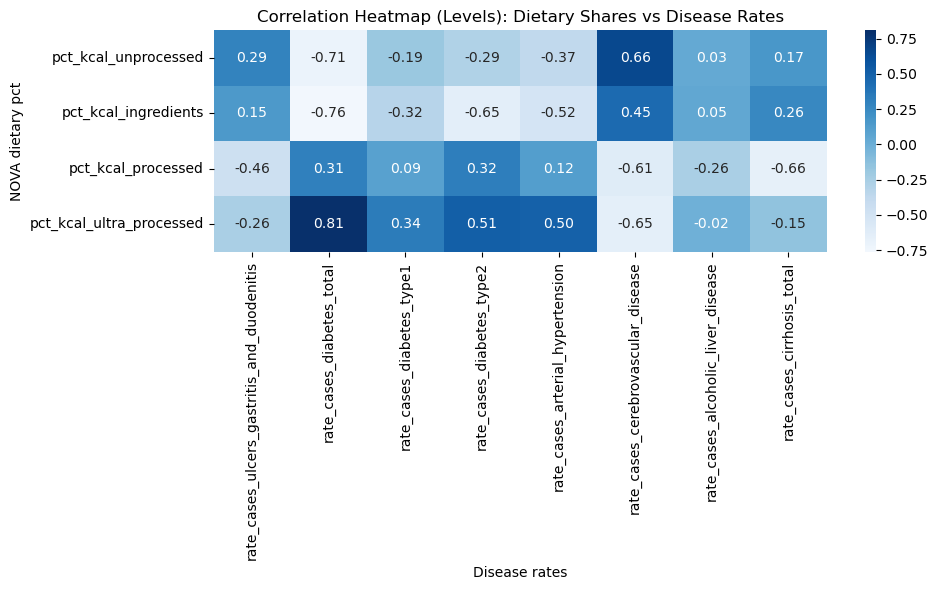

this first correlation matrix answers: Over long horizons, do diets and disease levels tend to move together across years?
N observations after differencing: 15


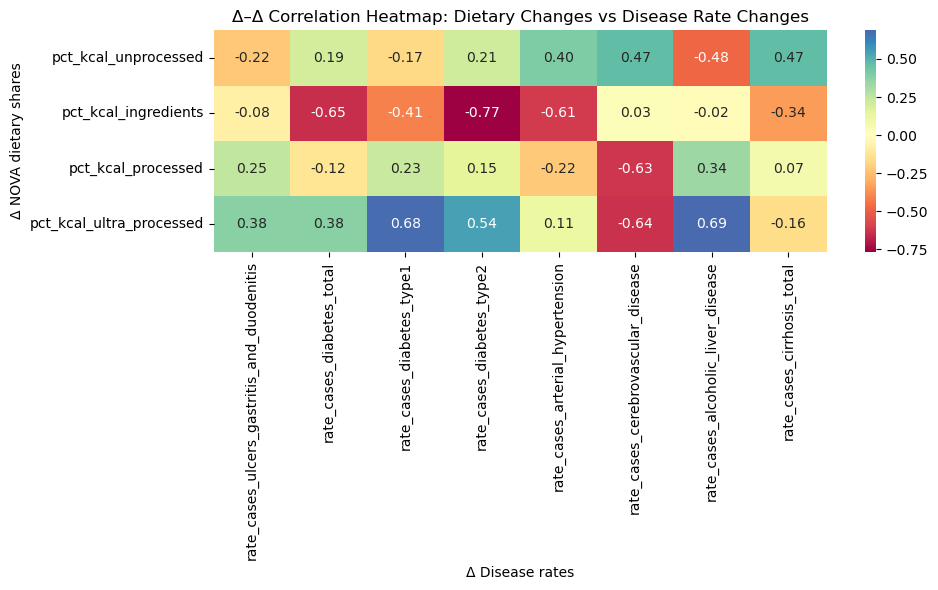

this second correlation matrix answers: When diet changes from one period to the next, do disease rates change in the same direction?


In [7]:
####VERSION 2####
##========================================
##C1. Short-Term Dynamic Associations Between NOVA Categories and Disease Rates
##========================================
## Do year-to-year changes in diet align with year-to-year changes in disease rates?
##--------------------------
### Setting datasets
##--------------------------

import pandas as pd
import numpy as np

merged = pd.read_csv("results/merged_ecological_set_eco2.csv")

merged = merged.sort_values("year").reset_index(drop=True)

#print("merged: ", merged) #prints okay until here!!!

# --- NOVA variables ---

nova_vars = [c for c in merged.columns if c.startswith("pct_kcal")]
#print("nova_vars \n", nova_vars)


# --- Chronic disease rates (adjust as needed) ---
disease_vars = [
    "rate_cases_ulcers_gastritis_and_duodenitis",
    "rate_cases_depression",
    "rate_cases_alzheimer",
    "rate_cases_parkinsons",
    "rate_cases_obesity",
    "rate_cases_malign_tumor_colon_and_rectum",
    "rate_cases_malign_tumor_stomach",
    "rate_cases_malign_tumor_encephalus_and_other_cns_parts",
    "rate_cases_diabetes_total", # proxy included
    "rate_cases_diabetes_type1",
    "rate_cases_diabetes_type2",
    "rate_cases_arterial_hypertension",
    "rate_cases_cerebrovascular_disease",
    "rate_cases_alcoholic_liver_disease",
    "rate_cases_cirrhosis_total",
]
 

# --- Create the dataset ---
cols = ["year"] + nova_vars + disease_vars
df = merged[cols]

#print(df)


##--------------------------
### Step — REMOVE DISEASES WITH TOO FEW OBSERVATIONS
##--------------------------

min_obs = 9   #### **************** conservative threshold

#getting valid diseases from df data frame
valid_diseases = [
    d for d in disease_vars
    if df[d].notna().sum() >= min_obs
]

##--------------------------
### step  - Correlation matrix (levels: diet vs disease)
##--------------------------
#creating correlation matrix
corr_nd = df[nova_vars + valid_diseases].corr()

# Extract only NOVA rows vs disease columns
corr_nova_dis_nd = corr_nd.loc[nova_vars, valid_diseases]

##--------------------------
### Step  — Heatmap (LEVELS)
##--------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    corr_nova_dis_nd,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    center=0
)

plt.title("Correlation Heatmap (Levels): Dietary Shares vs Disease Rates")
plt.xlabel("Disease rates")
plt.ylabel("NOVA dietary pct")
plt.tight_layout()
plt.savefig('results/Levels Correlation Heatmap: Dietary Changes vs Disease Rate Changes.png', dpi=500, bbox_inches='tight')
plt.show()

print("this first correlation matrix answers: Over long horizons, do diets and disease levels tend to move together across years?")

##--------------------------
### step  - FIRST DIFFERENCES
##--------------------------

df_diff =df[["year"] + nova_vars + valid_diseases].set_index("year").diff()


print("N observations after differencing:", len(df_diff))



##--------------------------
### step  - Correlation matrix (Δdiet vs Δdisease)
##--------------------------
corr = df_diff[nova_vars + valid_diseases].corr()

# Extract only NOVA rows vs disease columns
corr_nova_disease = corr.loc[nova_vars, valid_diseases]

corr_nova_disease.round(2)



##--------------------------
### Step  — Heatmap
##--------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    corr_nova_disease,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    center=0
)

plt.title("Δ–Δ Correlation Heatmap: Dietary Changes vs Disease Rate Changes")
plt.xlabel("Δ Disease rates")
plt.ylabel("Δ NOVA dietary shares")
plt.tight_layout()
# SAVE FIGURE (before plt.show
plt.savefig('results/First differences Correlation Heatmap: Dietary Changes vs Disease Rate Changes.png', dpi=500, bbox_inches='tight')
plt.show()


print("this second correlation matrix answers: When diet changes from one period to the next, do disease rates change in the same direction?")


* Correlation analysis

Two complementary correlation analyses were performed:

1. Level correlations
Pearson correlations were computed between dietary shares and disease incidence rates using the raw annual values. This analysis evaluates long-term co-movement between dietary structure and disease burden but may be influenced by secular trends and non-stationarity.

2. First-difference (Δ–Δ) correlations
To isolate short-term dynamic coupling, all dietary and disease variables were differenced by year using first differences. Correlations were then computed between year-to-year changes in dietary shares and year-to-year changes in disease rates. This approach reduces the influence of long-term trends and focuses on synchronized temporal fluctuations.



##========================================
## C2. Diabetes as a Systemic Mediator of Chronic Disease Dynamics
##========================================

C2. Diabetes as a Systemic Mediator of Chronic Disease Dynamics

* C2A. Long-Term Coupling Between Diabetes and Chronic Disease Rates (Full Dataset)
* C2B. Short-Term Coupling Between Dietary Transitions and Diabetes (Merged Dataset)
* C2B.1. Lagged Associations Between Ultra-Processed Food Intake and Subsequent Diabetes Change
* C2C. Sensitivity Analyses

##========================================
#### C2_A. Long-Term Coupling Between Diabetes TOTAL and Chronic Disease Rates (Full Dataset)
##========================================

Full disease dataset shape: (41, 42)

Diseases included:
 ['rate_cases_diabetes_type1', 'rate_cases_diabetes_type2', 'rate_cases_depression', 'rate_cases_alzheimer', 'rate_cases_parkinsons', 'rate_cases_obesity', 'rate_cases_malign_tumor_colon_and_rectum', 'rate_cases_malign_tumor_stomach', 'rate_cases_malign_tumor_encephalus_and_other_cns_parts', 'rate_cases_cerebrovascular_disease', 'rate_cases_bacterial_food_intoxication', 'rate_cases_brucelosis', 'rate_cases_ulcers_gastritis_and_duodenitis', 'rate_cases_hepatic_alcoholic_cirrhosis', 'rate_cases_hepatic_cirrhosis', 'rate_cases_cirrhosis_total', 'rate_cases_arterial_hypertension', 'rate_cases_alcoholic_liver_disease']


N observations after differencing: 41 



Δ–Δ correlations: Diabetes vs diseases: 

rate_cases_diabetes_type2                                 1.00
rate_cases_parkinsons                                     0.80
rate_cases_obesity                                        0.79
rate_cases_alzheimer                          

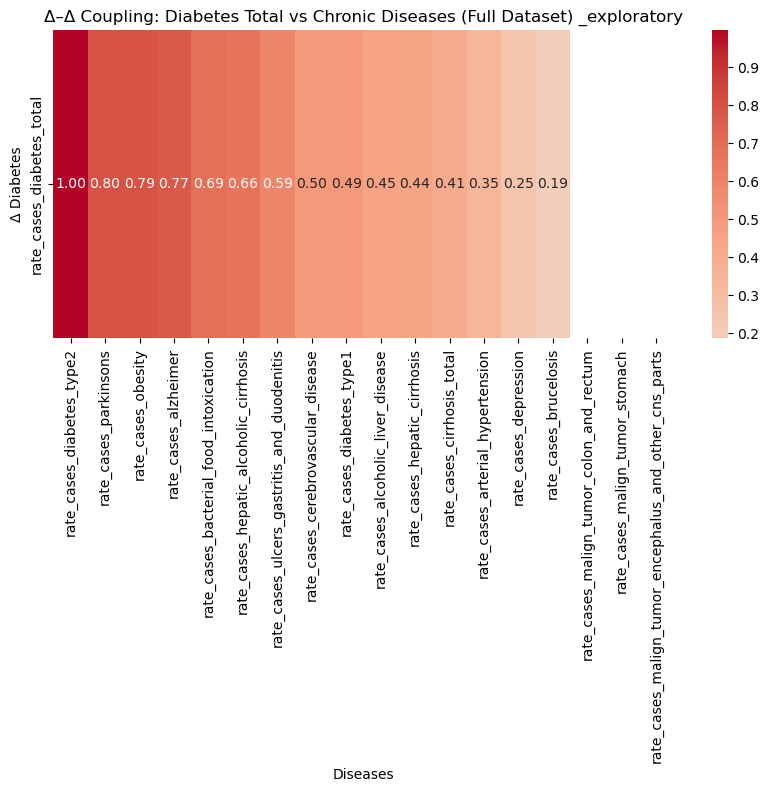

/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_53544/589754419.py:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


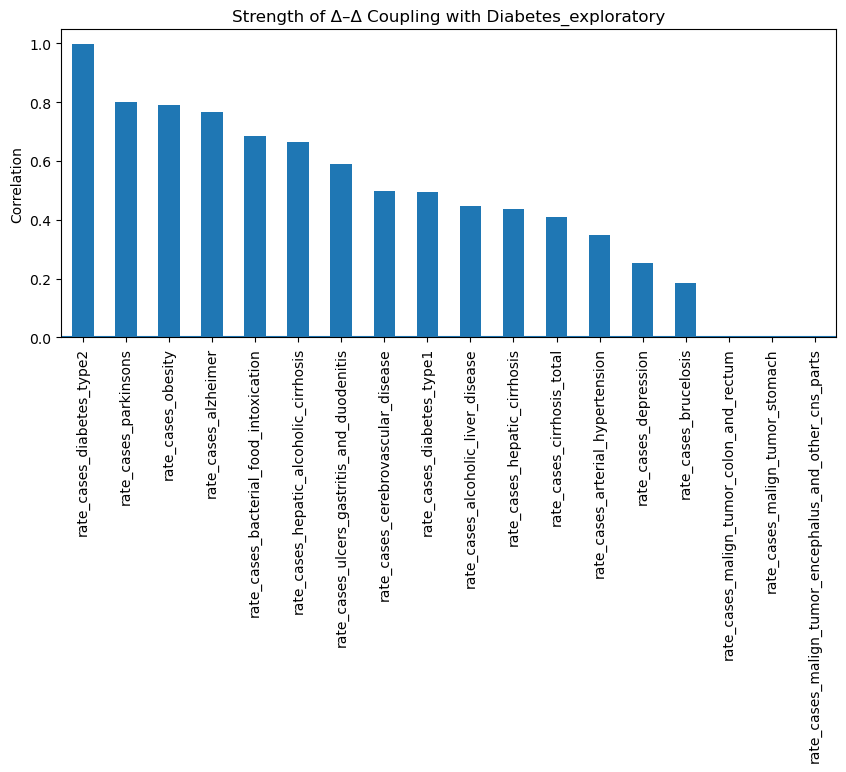

In [31]:
##================================
### C2_A. Long-term disease–diabetes total coupling (FULL DATASET)
##================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Load full disease dataset
# --------------------------
d = pd.read_csv("results/disease_with_rates_eco2.csv", decimal='.')
d = d.sort_values("year").reset_index(drop=True)

print("Full disease dataset shape:", d.shape)
#print(d)

# --------------------------
# Variables
# --------------------------
diabetes_var = "rate_cases_diabetes_total"

disease_vars = [
    c for c in d.columns
    if c.startswith("rate_cases_") and c != diabetes_var
]

print("\nDiseases included:\n", disease_vars)


# --------------------------
# Build dataframe
# --------------------------
cols = ["year", diabetes_var] + disease_vars
df = d[cols]

# --------------------------
# First differences (Δ)
# --------------------------
df_diff = df.set_index("year").diff()#.dropna() #If i use .dropna() the whole dataset colapses due to it's size

print("\n\nN observations after differencing:", len(df_diff), "\n\n")


# --------------------------
# Δ–Δ correlations
# --------------------------
corr = df_diff[[diabetes_var] + disease_vars].corr()

# Diabetes row vs diseases
corr_diabetes_diseases = corr.loc[diabetes_var, disease_vars].sort_values(ascending=False)

print("\nΔ–Δ correlations: Diabetes vs diseases: \n")
print(corr_diabetes_diseases.round(2), "\n\n")


# --------------------------
# Heatmap 1
# --------------------------
plt.figure(figsize=(10,4))
sns.heatmap(
    corr_diabetes_diseases.to_frame().T,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Δ–Δ Coupling: Diabetes Total vs Chronic Diseases (Full Dataset) _exploratory")
plt.xlabel("Diseases")
plt.ylabel("Δ Diabetes")
#plt.tight_layout() #not needed with this specific figure

plt.show()



# --------------------------
# Bar plot (optional but nice)
# --------------------------
corr_diabetes_diseases.plot(kind="bar", figsize=(10,4))
plt.axhline(0)
plt.title("Strength of Δ–Δ Coupling with Diabetes_exploratory")
plt.ylabel("Correlation")
plt.tight_layout()

plt.show()


Δ–Δ correlations: Diabetes vs diseases _v2
rate_cases_diabetes_type2                     1.00
rate_cases_parkinsons                         0.80
rate_cases_obesity                            0.79
rate_cases_alzheimer                          0.77
rate_cases_bacterial_food_intoxication        0.69
rate_cases_hepatic_alcoholic_cirrhosis        0.66
rate_cases_ulcers_gastritis_and_duodenitis    0.59
rate_cases_cerebrovascular_disease            0.50
rate_cases_diabetes_type1                     0.49
rate_cases_alcoholic_liver_disease            0.45
rate_cases_hepatic_cirrhosis                  0.44
rate_cases_cirrhosis_total                    0.41
rate_cases_arterial_hypertension              0.35
rate_cases_depression                         0.25
rate_cases_brucelosis                         0.19
Name: rate_cases_diabetes_total, dtype: float64


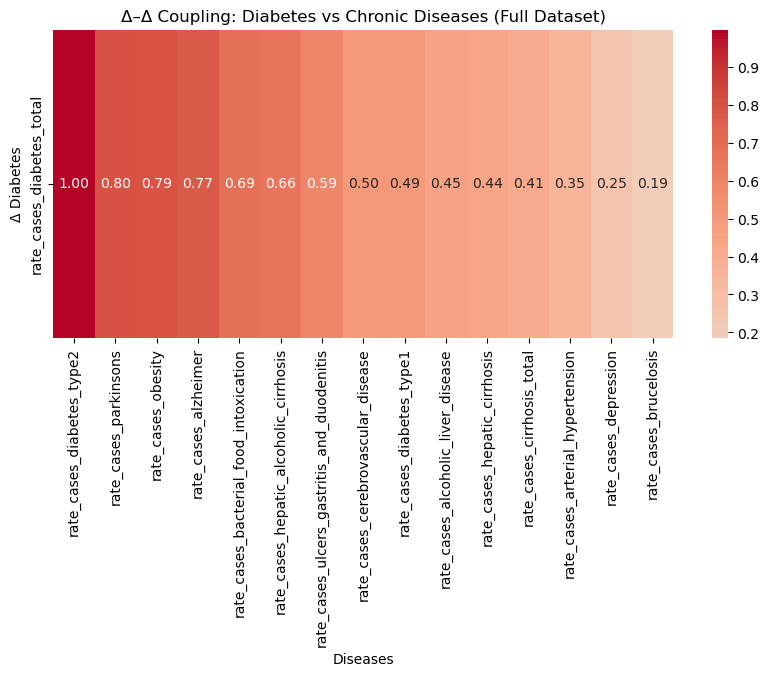

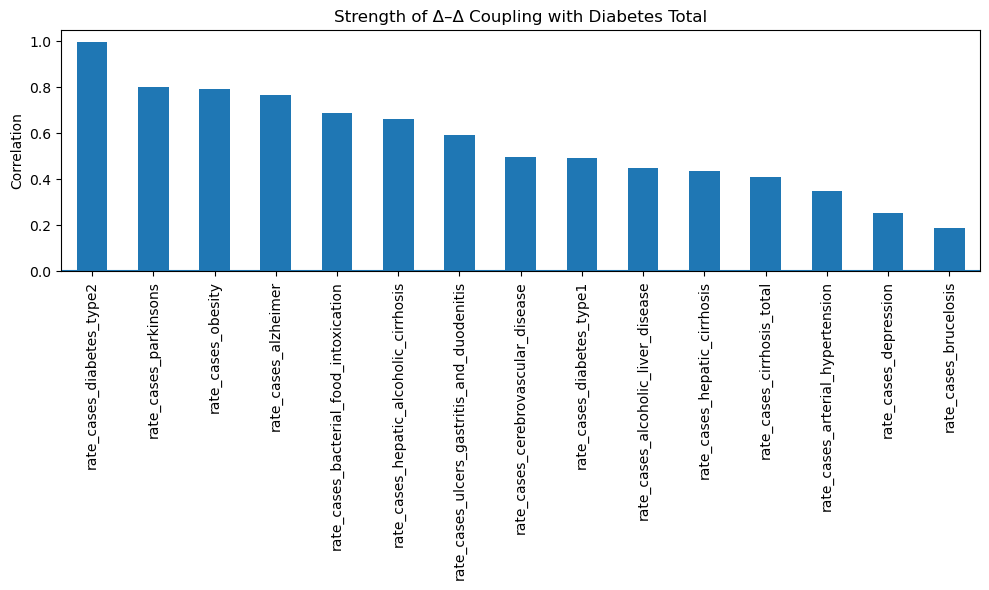

In [39]:
##--------------------------
### Step — REMOVE DISEASES WITH TOO FEW OBSERVATIONS
##--------------------------

min_obs = 10   # conservative threshold

#getting valid diseases from df data frame
valid_dis = [
    d for d in disease_vars
    if df_diff[d].notna().sum() >= min_obs
]

#--------------------------
# Δ–Δ correlations
# --------------------------
corr2 = df_diff[[diabetes_var] + valid_dis].corr()

# Diabetes row vs diseases
corr_diabetes_diseases2 = corr2.loc[diabetes_var, valid_dis].sort_values(ascending=False)

print("\nΔ–Δ correlations: Diabetes vs diseases _v2")
print(corr_diabetes_diseases2.round(2))


# --------------------------
# Heatmap 2
# --------------------------
plt.figure(figsize=(10,4))
sns.heatmap(
    corr_diabetes_diseases2.to_frame().T,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Δ–Δ Coupling: Diabetes vs Chronic Diseases (Full Dataset)")
plt.xlabel("Diseases")
plt.ylabel("Δ Diabetes")
#plt.tight_layout()
plt.savefig('results/First differences Coupling: Diabetes Total vs Chronic Diseases (Full Dataset).png', dpi=500, bbox_inches='tight')
plt.show()





# --------------------------
# Bar plot 2 (optional but nice)
# --------------------------
corr_diabetes_diseases2.plot(kind="bar", figsize=(10,6))
plt.axhline(0)
plt.title("Strength of Δ–Δ Coupling with Diabetes Total")
plt.savefig('results/Strength of First Differences Coupling with Diabetes.png', dpi=500, bbox_inches='tight')
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

Merged dataset shape: (15, 48)
   year  pct_kcal_ultra_processed  rate_cases_diabetes_total
0  1984                      10.5                  73.134709
1  1989                      13.9                 151.549076
2  1992                      13.2                 206.833646
3  1994                      14.0                 202.444095
4  1996                      13.2                 265.701085


 N observations after differencing: 14 




 Δ–Δ correlation: ΔUPF vs ΔDiabetes Total = 0.379 




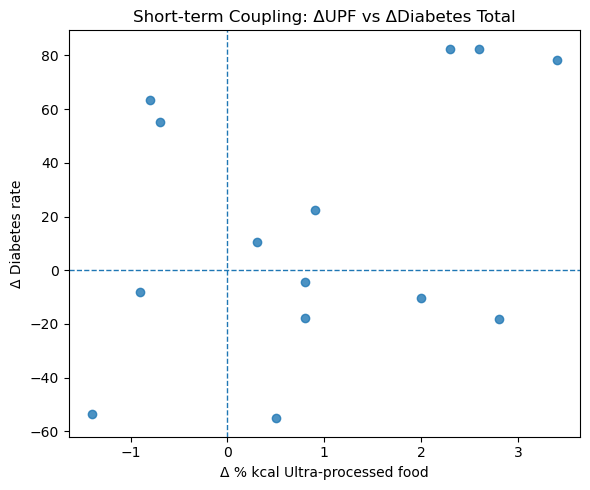

                                OLS Regression Results                               
Dep. Variable:     rate_cases_diabetes_total   R-squared:                       0.144
Model:                                   OLS   Adj. R-squared:                  0.073
Method:                        Least Squares   F-statistic:                     2.018
Date:                       Wed, 04 Feb 2026   Prob (F-statistic):              0.181
Time:                               16:22:28   Log-Likelihood:                -72.581
No. Observations:                         14   AIC:                             149.2
Df Residuals:                             12   BIC:                             150.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [15]:
#================================
# C2_B. Short-Term Coupling Between Dietary Transitions and Diabetes Total (Merged Dataset)
#================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --------------------------
# Load merged dataset
# --------------------------
merged = pd.read_csv("results/merged_ecological_set_eco2.csv", decimal='.')
merged = merged.sort_values("year").reset_index(drop=True)

print("Merged dataset shape:", merged.shape)

# --------------------------
# Variables
# --------------------------
upf_var = "pct_kcal_ultra_processed"
diabetes_var = "rate_cases_diabetes_total"

df = merged[["year", upf_var, diabetes_var]]

print(df.head())

# --------------------------
# First differences (Δ)
# --------------------------
df_diff = df.set_index("year").diff().dropna()

print("\n\n N observations after differencing:", len(df_diff), "\n\n")

# --------------------------
# Correlation
# --------------------------
corr = df_diff[[upf_var, diabetes_var]].corr().iloc[0,1]
print("\n\n Δ–Δ correlation: ΔUPF vs ΔDiabetes Total =", round(corr, 3), "\n\n")

#explicación de .iloc[#,#]
# .iloc[0,0] → corr(ΔUPF, ΔUPF) = 1
#.iloc[1,1] → corr(ΔDiabetes, ΔDiabetes) = 1
#.iloc[0,1] → corr(ΔUPF, ΔDiabetes) ✅
#.iloc[1,0] → same value (symmetric)

# --------------------------
# Scatter plot
# --------------------------
plt.figure(figsize=(6,5))
plt.scatter(
    df_diff[upf_var],
    df_diff[diabetes_var],
    alpha=0.8
)

plt.axhline(0, linestyle="--", linewidth=1)
plt.axvline(0, linestyle="--", linewidth=1)

plt.xlabel("Δ % kcal Ultra-processed food")
plt.ylabel("Δ Diabetes rate")
plt.title("Short-term Coupling: ΔUPF vs ΔDiabetes Total")
plt.savefig('results/Short-term Coupling: ΔUPF vs ΔDiabetes Total', dpi=500, bbox_inches='tight')
plt.tight_layout()

plt.show()

# --------------------------
# Optional: regression
# --------------------------
X = sm.add_constant(df_diff[upf_var])
y = df_diff[diabetes_var]

model = sm.OLS(y, X).fit()
print(model.summary())


Merged dataset shape: (15, 48)
   year  pct_kcal_ultra_processed  rate_cases_diabetes_total
0  1984                      10.5                  73.134709
1  1989                      13.9                 151.549076
2  1992                      13.2                 206.833646
3  1994                      14.0                 202.444095
4  1996                      13.2                 265.701085


 N observations after differencing: 14 




 Δ–Δ correlation: ΔUPF vs ΔDiabetes Total = 0.379 


                                OLS Regression Results                               
Dep. Variable:     rate_cases_diabetes_total   R-squared:                       0.144
Model:                                   OLS   Adj. R-squared:                  0.073
Method:                        Least Squares   F-statistic:                     2.018
Date:                       Wed, 04 Feb 2026   Prob (F-statistic):              0.181
Time:                               16:22:44   Log-Likelihood:            

/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_53544/3602035514.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_53544/3602035514.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_53544/3602035514.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

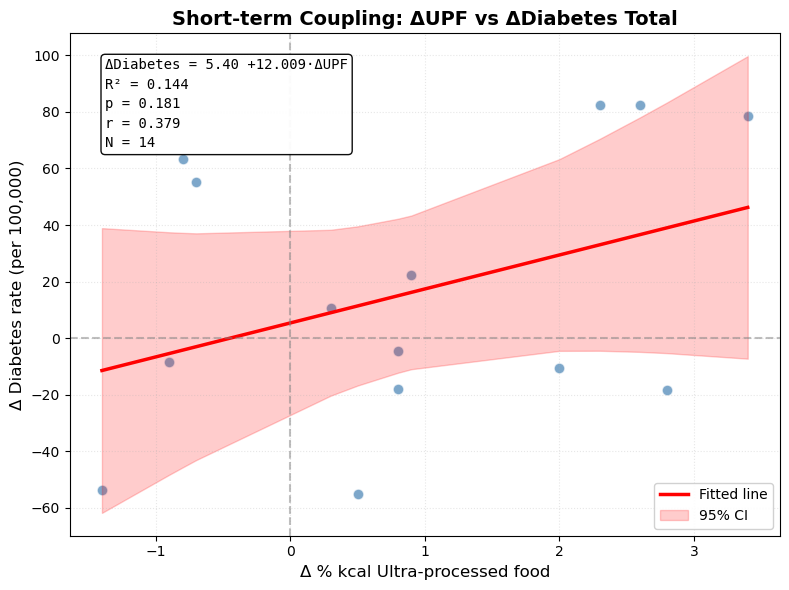

In [16]:
#================================
# C2_B. Short-Term Coupling Between Dietary Transitions and Diabetes Total (Merged Dataset)
#================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --------------------------
# Load merged dataset
# --------------------------
merged = pd.read_csv("results/merged_ecological_set_eco2.csv", decimal='.')
merged = merged.sort_values("year").reset_index(drop=True)

print("Merged dataset shape:", merged.shape)

# --------------------------
# Variables
# --------------------------
upf_var = "pct_kcal_ultra_processed"
diabetes_var = "rate_cases_diabetes_total"

df = merged[["year", upf_var, diabetes_var]]

print(df.head())

# --------------------------
# First differences (Δ)
# --------------------------
df_diff = df.set_index("year").diff().dropna()

print("\n\n N observations after differencing:", len(df_diff), "\n\n")

# --------------------------
# Correlation
# --------------------------
corr = df_diff[[upf_var, diabetes_var]].corr().iloc[0,1]
print("\n\n Δ–Δ correlation: ΔUPF vs ΔDiabetes Total =", round(corr, 3), "\n\n")

# --------------------------
# Regression analysis
# --------------------------
X = sm.add_constant(df_diff[upf_var])
y = df_diff[diabetes_var]

model = sm.OLS(y, X).fit()
print(model.summary())

# Extract regression statistics
intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for slope
n_obs = len(df_diff)

# --------------------------
# Confidence bands and plotting
# --------------------------
import scipy.stats as stats

# Calculate confidence intervals for regression line
alpha = 0.05  # 95% confidence
t_val = stats.t.ppf(1-alpha/2, df=model.df_resid)

# Get predictions and confidence intervals
predictions = model.get_prediction()
pred_summary = predictions.summary_frame(alpha=alpha)

print("prediction summary confidence intervals:", pred_summary)

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot
ax.scatter(
    df_diff[upf_var],
    df_diff[diabetes_var],
    alpha=0.7,
    s=60,
    color='steelblue',
    edgecolor='white',
    linewidth=1
)

# Sort for plotting
sorted_idx = np.argsort(df_diff[upf_var])
x_sorted = df_diff[upf_var].iloc[sorted_idx].values
y_pred_sorted = pred_summary['mean'].iloc[sorted_idx].values
ci_low_sorted = pred_summary['mean_ci_lower'].iloc[sorted_idx].values
ci_high_sorted = pred_summary['mean_ci_upper'].iloc[sorted_idx].values

# Plot regression line with confidence band
ax.plot(x_sorted, y_pred_sorted, 'r-', linewidth=2.5, label='Fitted line')
ax.fill_between(x_sorted, ci_low_sorted, ci_high_sorted, 
                color='red', alpha=0.2, label='95% CI')

# Zero lines
ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Labels
ax.set_xlabel("Δ % kcal Ultra-processed food", fontsize=12, fontweight='medium')
ax.set_ylabel("Δ Diabetes rate (per 100,000)", fontsize=12, fontweight='medium')
ax.set_title("Short-term Coupling: ΔUPF vs ΔDiabetes Total", 
             fontsize=14, fontweight='bold')

# Add statistics box
stats_text = (
    f"ΔDiabetes = {intercept:.2f} {slope:+.3f}·ΔUPF\n"
    f"R² = {r_squared:.3f}\n"
    f"p = {p_value:.3g}\n"
    f"r = {corr:.3f}\n"
    f"N = {n_obs}"
)

ax.text(
    0.05, 0.95,
    stats_text,
    transform=ax.transAxes,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.95, 
              edgecolor='black', linewidth=1),
    verticalalignment='top',
    fontsize=10,
    fontfamily='monospace',
    linespacing=1.5
)

ax.legend(loc='lower right', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle=':')

plt.tight_layout()
plt.savefig('results/C2B_diabetes_coupling_with_CI.png', dpi=600, bbox_inches='tight')
plt.show()

In [379]:

#================================
# C2_B_1 .- Lagged Associations Between Ultra-Processed Food Intake and Subsequent Diabetes Change
#================================
## Does last period’s dietary change predict this period’s diabetes change?

df_lag = df_diff[[upf_var, diabetes_var]].dropna().copy()

df_lag["ΔUPF_lag1"] = df_lag[upf_var].shift(1)
df_lag = df_lag.dropna()

from statsmodels.api import OLS, add_constant

X = add_constant(df_lag["ΔUPF_lag1"])
y = df_lag[diabetes_var]

lag_model = OLS(y, X).fit()
print(lag_model.summary())


                                OLS Regression Results                               
Dep. Variable:     rate_cases_diabetes_total   R-squared:                       0.039
Model:                                   OLS   Adj. R-squared:                 -0.048
Method:                        Least Squares   F-statistic:                    0.4473
Date:                       Wed, 28 Jan 2026   Prob (F-statistic):              0.517
Time:                               13:01:57   Log-Likelihood:                -67.674
No. Observations:                         13   AIC:                             139.3
Df Residuals:                             11   BIC:                             140.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [380]:
# C2_B_2 .- Confidence intervals for correlations
from scipy.stats import pearsonr

r, p = pearsonr(
    df_diff[upf_var].dropna(),
    df_diff[diabetes_var].dropna()
)

print("r =", round(r,3), "p =", round(p,3))


r = 0.379 p = 0.181


In [ ]:
C2_C - SENSITIVITY ANALYSES


Full disease dataset shape: (41, 42) 



Diseases included:
 ['rate_cases_diabetes_type1', 'rate_cases_diabetes_total', 'rate_cases_depression', 'rate_cases_alzheimer', 'rate_cases_parkinsons', 'rate_cases_obesity', 'rate_cases_malign_tumor_colon_and_rectum', 'rate_cases_malign_tumor_stomach', 'rate_cases_malign_tumor_encephalus_and_other_cns_parts', 'rate_cases_cerebrovascular_disease', 'rate_cases_bacterial_food_intoxication', 'rate_cases_brucelosis', 'rate_cases_ulcers_gastritis_and_duodenitis', 'rate_cases_hepatic_alcoholic_cirrhosis', 'rate_cases_hepatic_cirrhosis', 'rate_cases_cirrhosis_total', 'rate_cases_arterial_hypertension', 'rate_cases_alcoholic_liver_disease']


N observations after differencing: 41 



Δ–Δ correlations: Diabetes type 2 vs diseases
rate_cases_diabetes_total                                 1.00
rate_cases_parkinsons                                     0.80
rate_cases_obesity                                        0.79
rate_cases_alzheimer                  

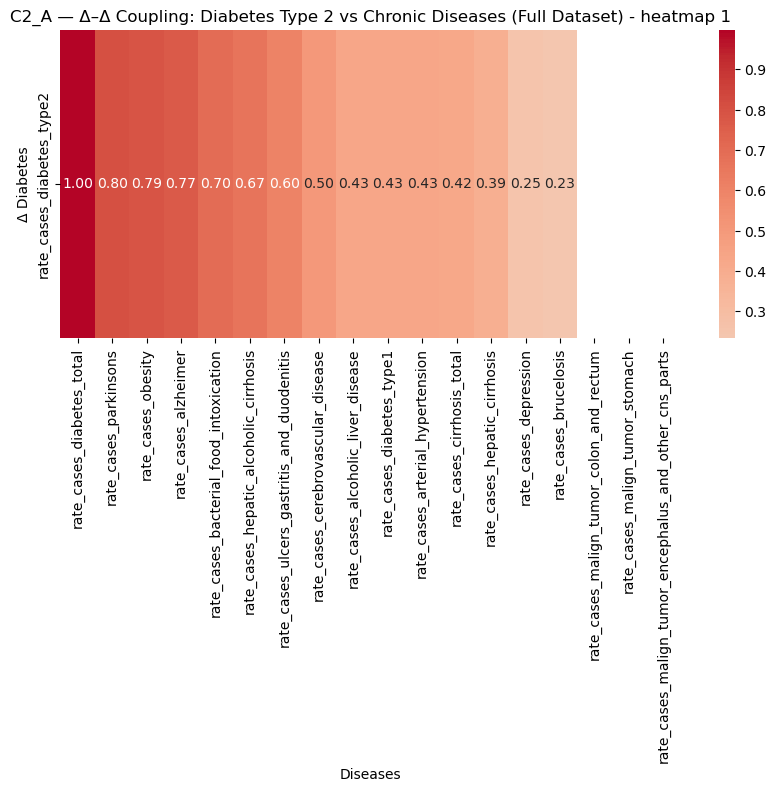

/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_53544/3531317449.py:85: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


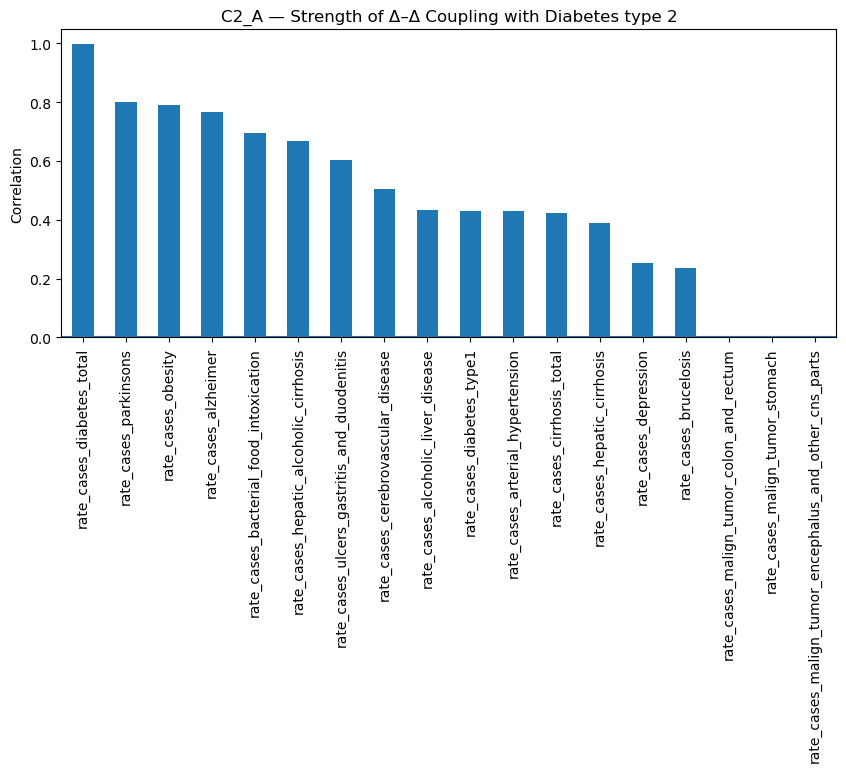

In [17]:
##================================
### C2_C1. Long-term disease–diabetes coupling (FULL DATASET)
##================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Load full disease dataset
# --------------------------
d = pd.read_csv("results/disease_with_rates_eco2.csv", decimal='.')
d = d.sort_values("year").reset_index(drop=True)

print("\nFull disease dataset shape:", d.shape, "\n\n")
#print(d)

# --------------------------
# Variables
# --------------------------
diabetes2_var = "rate_cases_diabetes_type2"

disease_vars = [
    c for c in d.columns
    if c.startswith("rate_cases_") and c != diabetes2_var
]

print("\nDiseases included:\n", disease_vars)


# --------------------------
# Build dataframe
# --------------------------
cols = ["year", diabetes2_var] + disease_vars
df = d[cols]

# --------------------------
# First differences (Δ)
# --------------------------
df_diff = df.set_index("year").diff()#.dropna() #If i use .dropna() the whole dataset colapses due to it's size

print("\n\nN observations after differencing:", len(df_diff), "\n\n")


# --------------------------
# Δ–Δ correlations
# --------------------------
corr = df_diff[[diabetes2_var] + disease_vars].corr()

# Diabetes row vs diseases
corr_diabetes_diseases = corr.loc[diabetes2_var, disease_vars].sort_values(ascending=False)

print("\nΔ–Δ correlations: Diabetes type 2 vs diseases")
print(corr_diabetes_diseases.round(2))


# --------------------------
# Heatmap 1
# --------------------------
plt.figure(figsize=(10,4))
sns.heatmap(
    corr_diabetes_diseases.to_frame().T,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("C2_A — Δ–Δ Coupling: Diabetes Type 2 vs Chronic Diseases (Full Dataset) - heatmap 1")
plt.xlabel("Diseases")
plt.ylabel("Δ Diabetes")
#plt.tight_layout()
plt.show()



# --------------------------
# Bar plot (optional but nice)
# --------------------------
corr_diabetes_diseases.plot(kind="bar", figsize=(10,4))
plt.axhline(0)
plt.title("C2_A — Strength of Δ–Δ Coupling with Diabetes type 2")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

Full disease dataset shape: (41, 42)

Diseases included:
 ['rate_cases_diabetes_type1', 'rate_cases_diabetes_type2', 'rate_cases_diabetes_total', 'rate_cases_depression', 'rate_cases_alzheimer', 'rate_cases_parkinsons', 'rate_cases_obesity', 'rate_cases_malign_tumor_colon_and_rectum', 'rate_cases_malign_tumor_stomach', 'rate_cases_malign_tumor_encephalus_and_other_cns_parts', 'rate_cases_cerebrovascular_disease', 'rate_cases_bacterial_food_intoxication', 'rate_cases_brucelosis', 'rate_cases_ulcers_gastritis_and_duodenitis', 'rate_cases_hepatic_alcoholic_cirrhosis', 'rate_cases_hepatic_cirrhosis', 'rate_cases_cirrhosis_total', 'rate_cases_alcoholic_liver_disease']


N observations after differencing: 41 



Δ–Δ correlations: hypertension vs diseases: 

rate_cases_obesity                                        0.77
rate_cases_alzheimer                                      0.67
rate_cases_parkinsons                                     0.65
rate_cases_ulcers_gastritis_and_duodenitis       

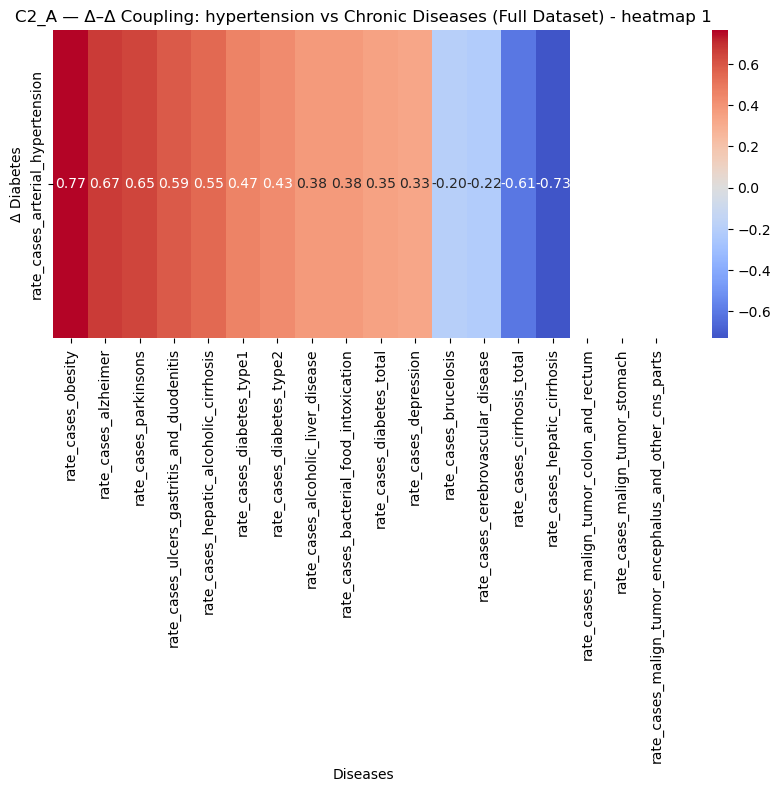

/var/folders/w9/bwws86216wgb0hvxvlbzqqt40000gn/T/ipykernel_53544/1583009222.py:85: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


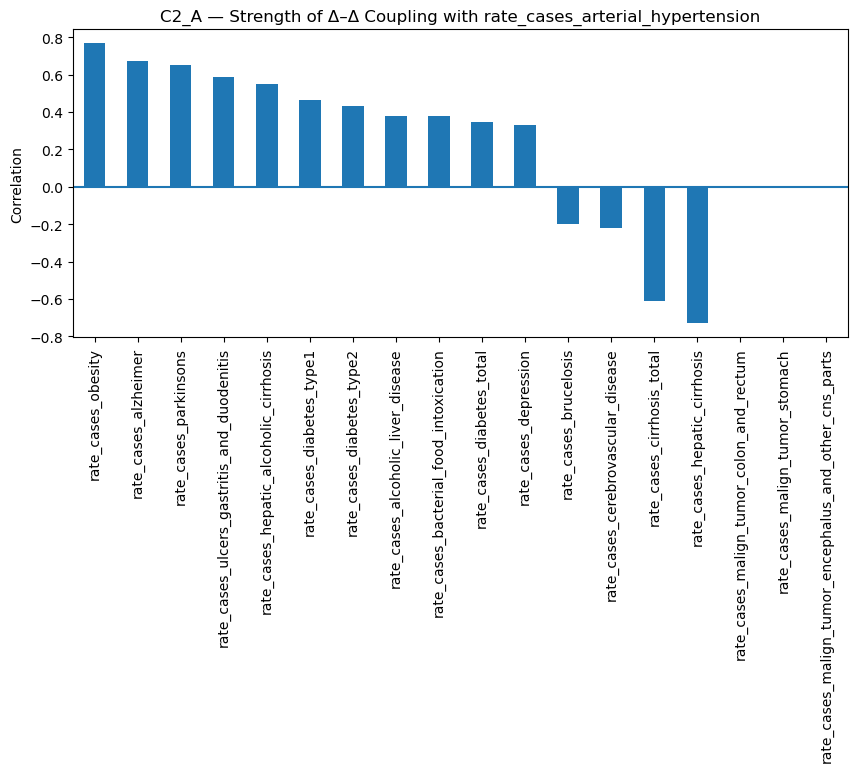

In [22]:
##================================
###  C2_C2. Long-term disease–hipertension coupling (FULL DATASET)
##================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Load full disease dataset
# --------------------------
d = pd.read_csv("results/disease_with_rates_eco2.csv", decimal='.')
d = d.sort_values("year").reset_index(drop=True)

print("Full disease dataset shape:", d.shape)
#print(d)

# --------------------------
# Variables
# --------------------------
hyper_var = "rate_cases_arterial_hypertension"

disease_vars = [
    c for c in d.columns
    if c.startswith("rate_cases_") and c != hyper_var
]

print("\nDiseases included:\n", disease_vars)


# --------------------------
# Build dataframe
# --------------------------
cols = ["year", hyper_var] + disease_vars
df = d[cols]

# --------------------------
# First differences (Δ)
# --------------------------
df_diff = df.set_index("year").diff()#.dropna() #If i use .dropna() the whole dataset colapses due to it's size

print("\n\nN observations after differencing:", len(df_diff), "\n\n")


# --------------------------
# Δ–Δ correlations
# --------------------------
corr = df_diff[[hyper_var] + disease_vars].corr()

# Diabetes row vs diseases
corr_hyper_var_diseases = corr.loc[hyper_var, disease_vars].sort_values(ascending=False)

print("\nΔ–Δ correlations: hypertension vs diseases: \n")
print(corr_hyper_var_diseases.round(2), "\n\n")


# --------------------------
# Heatmap 1
# --------------------------
plt.figure(figsize=(10,4))
sns.heatmap(
    corr_hyper_var_diseases.to_frame().T,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("C2_A — Δ–Δ Coupling: hypertension vs Chronic Diseases (Full Dataset) - heatmap 1")
plt.xlabel("Diseases")
plt.ylabel("Δ Diabetes")
#plt.tight_layout()
plt.show()



# --------------------------
# Bar plot (optional but nice)
# --------------------------
corr_hyper_var_diseases.plot(kind="bar", figsize=(10,4))
plt.axhline(0)
plt.title("C2_A — Strength of Δ–Δ Coupling with {}".format(hyper_var))
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

Merged dataset shape: (15, 48)
   year  pct_kcal_ultra_processed  rate_cases_diabetes_type2
0  1984                      10.5                        NaN
1  1989                      13.9                        NaN
2  1992                      13.2                        NaN
3  1994                      14.0                        NaN
4  1996                      13.2                 265.701085


 N observations after differencing: 10 




Δ–Δ correlation: ΔUPF vs rate_cases_diabetes_type2 = 0.544




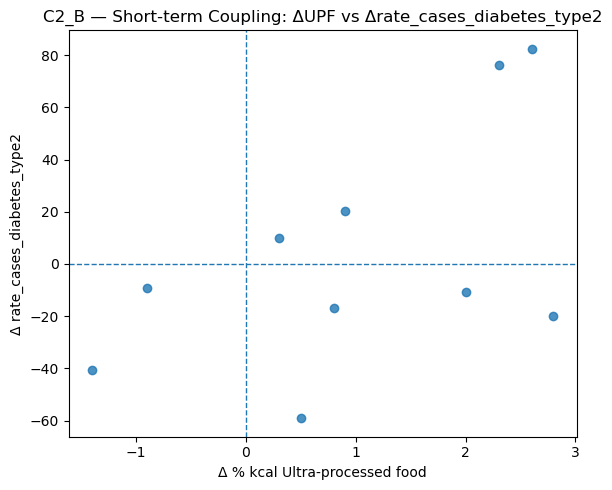

                                OLS Regression Results                               
Dep. Variable:     rate_cases_diabetes_type2   R-squared:                       0.295
Model:                                   OLS   Adj. R-squared:                  0.207
Method:                        Least Squares   F-statistic:                     3.355
Date:                       Wed, 28 Jan 2026   Prob (F-statistic):              0.104
Time:                               13:36:21   Log-Likelihood:                -50.190
No. Observations:                         10   AIC:                             104.4
Df Residuals:                              8   BIC:                             105.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [398]:
#================================
# C2_C3. Short-Term Coupling Between Dietary Transitions and Diabetes Type 2 (Merged Dataset)
#================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --------------------------
# Load merged dataset
# --------------------------
merged = pd.read_csv("results/merged_ecological_set_eco2.csv", decimal='.')
merged = merged.sort_values("year").reset_index(drop=True)

print("Merged dataset shape:", merged.shape)

# --------------------------
# Variables
# --------------------------
upf_var = "pct_kcal_ultra_processed"
disease_var = "rate_cases_diabetes_type2"

df = merged[["year", upf_var, disease_var]]

print(df.head())

# --------------------------
# First differences (Δ)
# --------------------------
df_diff = df.set_index("year").diff().dropna()

print("\n\n N observations after differencing:", len(df_diff), "\n\n")

# --------------------------
# Correlation
# --------------------------
corr = df_diff[[upf_var, disease_var]].corr().iloc[0,1]
print("\n\nΔ–Δ correlation: ΔUPF vs {} = {}\n\n".format(disease_var, round(corr, 3)))

#explicación de .iloc[#,#]
# .iloc[0,0] → corr(ΔUPF, ΔUPF) = 1
#.iloc[1,1] → corr(ΔDiabetes, ΔDiabetes) = 1
#.iloc[0,1] → corr(ΔUPF, ΔDiabetes) ✅
#.iloc[1,0] → same value (symmetric)

# --------------------------
# Scatter plot
# --------------------------
plt.figure(figsize=(6,5))
plt.scatter(
    df_diff[upf_var],
    df_diff[disease_var],
    alpha=0.8
)

plt.axhline(0, linestyle="--", linewidth=1)
plt.axvline(0, linestyle="--", linewidth=1)

plt.xlabel("Δ % kcal Ultra-processed food")
plt.ylabel("Δ {}".format(disease_var))
plt.title("C2_B — Short-term Coupling: ΔUPF vs Δ{}".format(disease_var))
plt.tight_layout()
plt.show()

# --------------------------
# Optional: regression
# --------------------------
X = sm.add_constant(df_diff[upf_var])
y = df_diff[disease_var]

model = sm.OLS(y, X).fit()
print(model.summary())

